In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('C:\\Users\\chann\\Downloads\\hotel_reviews.xlsx')

In [3]:
df.head()

Review  Rating   @
0  nice hotel expensive parking got good deal sta...     4.0 NaN
1  ok nothing special charge diamond member hilto...     2.0 NaN
2  nice rooms not 4* experience hotel monaco seat...     3.0 NaN
3  unique, great stay, wonderful time hotel monac...     5.0 NaN
4  great stay great stay, went seahawk game aweso...     5.0 NaN

In [4]:
df1=df.iloc[:,:-1]

In [5]:
df1.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...     4.0
1  ok nothing special charge diamond member hilto...     2.0
2  nice rooms not 4* experience hotel monaco seat...     3.0
3  unique, great stay, wonderful time hotel monac...     5.0
4  great stay great stay, went seahawk game aweso...     5.0

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [7]:
df1.shape

(20491, 2)

In [8]:
#columns
df.columns


Index(['Review', 'Rating', '@'], dtype='object')

In [9]:
#unique values
df.nunique()


Review    20491
Rating        5
@             0
dtype: int64

In [10]:
df1.isnull().sum()

Review    0
Rating    0
dtype: int64

In [11]:
df1['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [12]:
df1.duplicated().sum()

0

In [13]:
df1.dtypes

Review     object
Rating    float64
dtype: object

In [14]:
df1['Rating']

0        4.0
1        2.0
2        3.0
3        5.0
4        5.0
        ... 
20486    5.0
20487    4.0
20488    2.0
20489    1.0
20490    2.0
Name: Rating, Length: 20491, dtype: float64

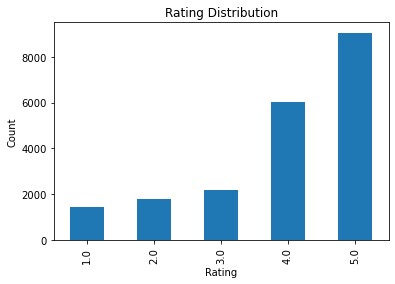

In [15]:
df1['Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [16]:
label= LabelEncoder()
df1['Rating'] = label.fit_transform(df1['Rating'])

In [17]:
df1

Review  Rating
0      nice hotel expensive parking got good deal sta...       3
1      ok nothing special charge diamond member hilto...       1
2      nice rooms not 4* experience hotel monaco seat...       2
3      unique, great stay, wonderful time hotel monac...       4
4      great stay great stay, went seahawk game aweso...       4
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       4
20487  great location price view hotel great quick pl...       3
20488  ok just looks nice modern outside, desk staff ...       1
20489  hotel theft ruined vacation hotel opened sept ...       0
20490  people talking, ca n't believe excellent ratin...       1

[20491 rows x 2 columns]

In [18]:
#Count of null values#
count=df.isnull().sum().sort_values(ascending=True)
percentage=((df.isnull().sum()/len(df)*100))
missing_data=pd.concat([count,percentage],axis=1,keys=["Count","Percentage"])



In [19]:
x=df1['Review']
y=df1['Rating']

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<AxesSubplot:xlabel='Rating', ylabel='count'>

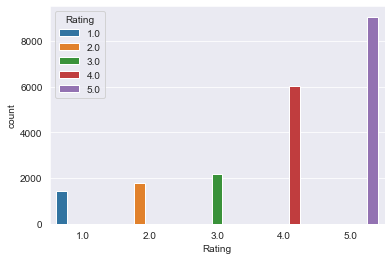

In [21]:
#Rating Count
sns.set_style("darkgrid")
sns.countplot(x="Rating",hue="Rating",data=df)



5.0    44.19
4.0    29.47
3.0    10.66
2.0     8.75
1.0     6.93
Name: Rating, dtype: float64


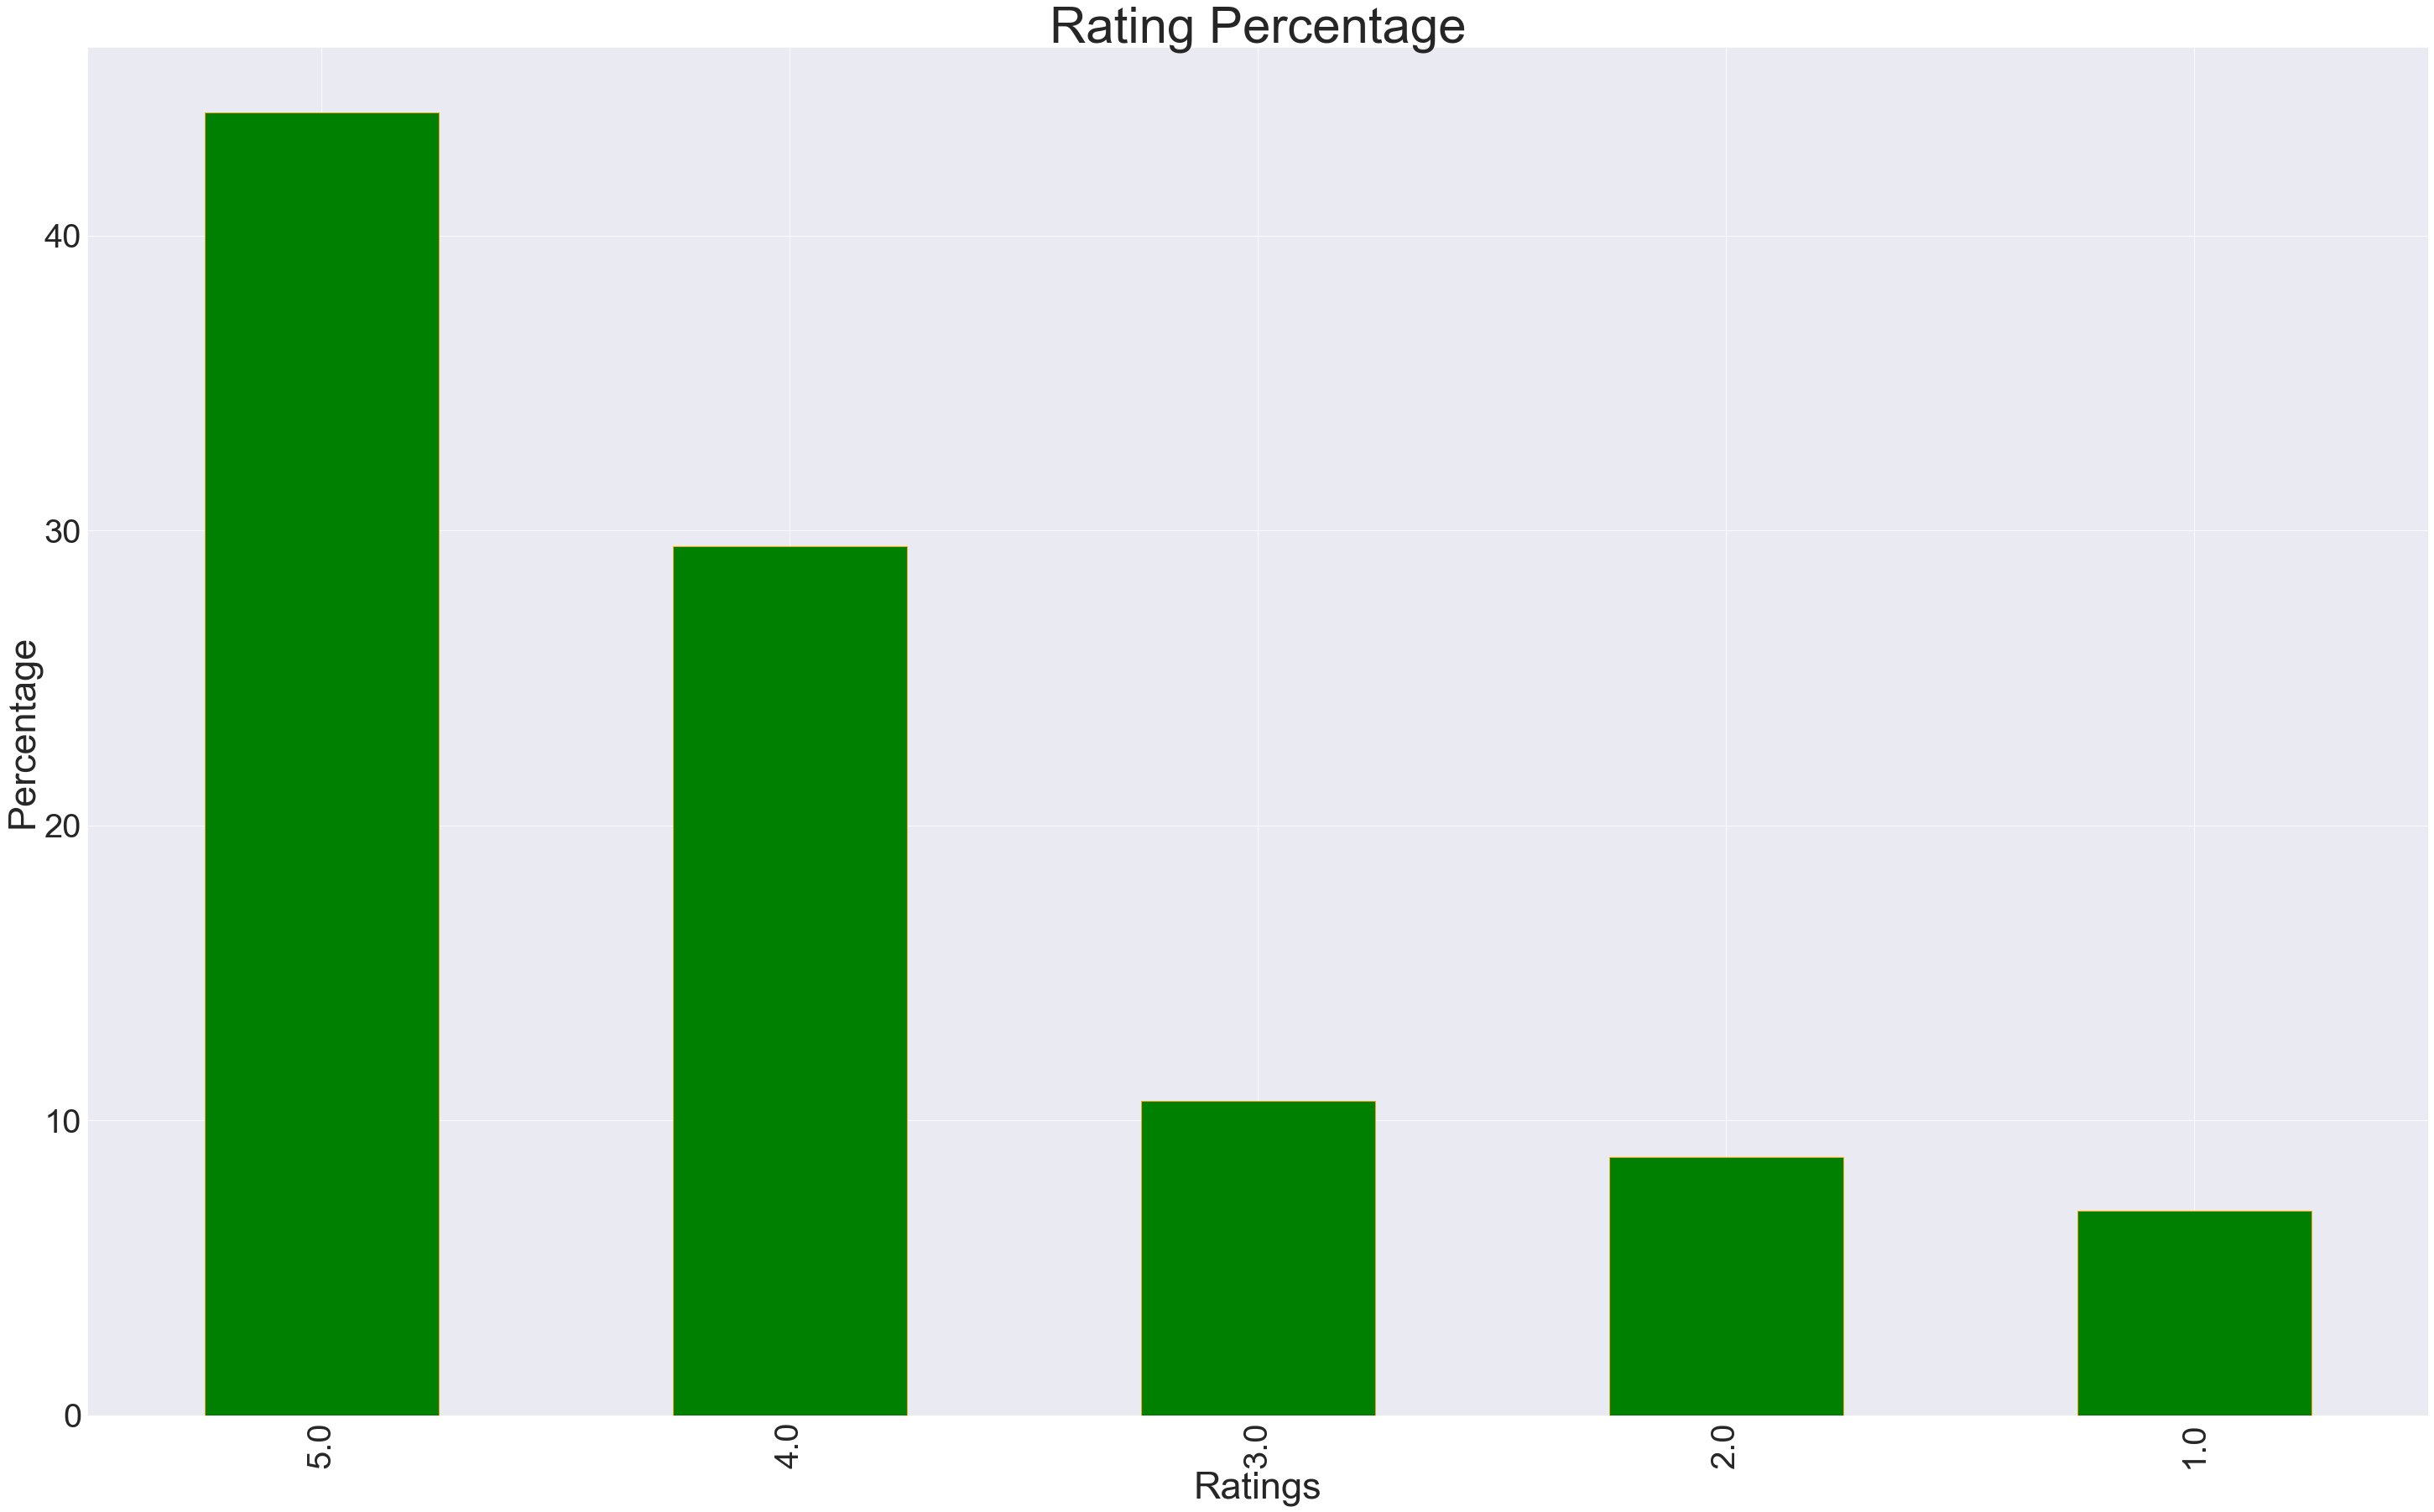

In [22]:
#Percentage of Rating distribution
print(round(df.Rating.value_counts(normalize=True)*100,2))
round(df.Rating.value_counts(normalize=True)*100,2)
round(df.Rating.value_counts(normalize=True)*100,2).plot(kind="bar",figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel("Ratings",fontsize=45)
plt.ylabel("Percentage",fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title("Rating Percentage",fontsize=60)
plt.show()

In [25]:
corpus

[['nice',
  'hotel',
  'expens',
  'park',
  'got',
  'good',
  'deal',
  'stay',
  'hotel',
  'anniversari',
  'arriv',
  'late',
  'even',
  'took',
  'advic',
  'previou',
  'review',
  'valet',
  'park',
  'check',
  'quick',
  'easi',
  'littl',
  'disappoint',
  'non',
  'exist',
  'view',
  'room',
  'room',
  'clean',
  'nice',
  'size',
  'bed',
  'comfort',
  'woke',
  'stiff',
  'neck',
  'high',
  'pillow',
  'soundproof',
  'like',
  'heard',
  'music',
  'room',
  'night',
  'morn',
  'loud',
  'bang',
  'door',
  'open',
  'close',
  'hear',
  'peopl',
  'talk',
  'hallway',
  'mayb',
  'noisi',
  'neighbor',
  'aveda',
  'bath',
  'product',
  'nice',
  'goldfish',
  'stay',
  'nice',
  'touch',
  'taken',
  'advantag',
  'stay',
  'longer',
  'locat',
  'great',
  'walk',
  'distanc',
  'shop',
  'overal',
  'nice',
  'experi',
  'pay',
  'park',
  'night'],
 ['ok',
  'noth',
  'special',
  'charg',
  'diamond',
  'member',
  'hilton',
  'decid',
  'chain',
  'shot',
 

In [24]:
ps = PorterStemmer()
corpus = []
for i in range(len(x)):
    print(i)
    review = re.sub('[^a-zA-Z ]'," ", x[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

#Importing libraries for text preprocessing

In [26]:
#Importing libraries for text preprocessing

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stemmer=PorterStemmer()
import nltk
nltk.download('wordnet')

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chann\AppData\Roaming\nltk_data...


{'fifty', 'whence', 'wherein', 'thereby', 'another', 'meanwhile', 'myself', 'out', 'except', 'why', 'beside', 'serious', 'down', 'too', 'only', 'by', 'five', 'although', 'into', 'several', 'who', 'becoming', 'eight', "'ve", 'on', 'other', 'regarding', 'mine', 'at', 'sixty', 'done', 'below', 'therein', 'used', 'hence', 'moreover', 'did', 'them', 'namely', 'whatever', 'noone', 'enough', 'name', 'though', 'him', "'ll", 'what', 'those', 'whereupon', 'toward', 'she', 'former', 'every', 'during', 'herein', 'nt', 'do', 'together', 'then', 'because', 'for', 'part', 'nevertheless', 'me', 'n‘t', 'hereupon', 'hotel', 'much', 'thus', 'thereupon', 'same', 'your', 'was', 'could', 'anywhere', 'few', 'becomes', 'latter', 'bottom', 'so', 'our', 'some', 'make', 'whither', 'ever', 'had', 'seem', 'when', 'least', 'it', 'next', 'to', 'top', 'neither', 'have', 'whenever', 'seems', 'somewhere', 'which', 'move', 'up', 'also', 'how', 'even', 'ten', '’d', 'anyhow', 'alone', 'everything', 'using', 'six', 'all', 

In [27]:
#Cleaning of texts ie punctuations,special characters,numerical values ,lowering of letters
def text_clean(text):
    text=text.lower()

    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)

    return text


In [28]:
#Applying function to dataset
cleaned1 = lambda x: text_clean(x)
df["Cleaned_Reviews"]=pd.DataFrame(df.Review.apply(cleaned1))




In [38]:
#Performing lemmatization


Reviews1=df.copy()
Reviews1.drop(["Review","Rating"],axis=1,inplace=True)
Reviews1["Cleaned_Reviews"][6]


corpus=[]



for i in range  (0,len(Reviews1)):
    review=re.sub("[^a-zA-Z]"," ",Reviews1["Cleaned_Reviews"][i])

    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in STOP_WORDS]
    review=" ".join(review)
    corpus.append(review)


corpus[6]

df["Cleaned_Review_Lemmatized"]=corpus

In [39]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [40]:
#Polarity and subjectivity#
import textblob
from textblob import TextBlob

df["Polarity"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.polarity)
df["Subjectivity"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:TextBlob(x).sentiment.subjectivity)

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

df['polarity_score']=df['Polarity'].\
   map(lambda x: sentiment(x))

pos = [5,4,3]
neg = [1]
neu=[2]

def sentiment(rating):
  if rating in pos:
    return "positive"
  elif rating in neg:
    return "negative"
  elif rating in neu:
      return "neutral"

df['Sentiment'] = df['Rating'].apply(sentiment)


In [31]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
ps=PorterStemmer()
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chann\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)

def text_clean(text):
    text=text.lower()

    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)

    return text

cleaned1 = lambda x: text_clean(x)
df["Cleaned_Reviews"]=pd.DataFrame(df.Review.apply(cleaned1))


Reviews1=df.copy()
Reviews1.drop(["Review","Rating"],axis=1,inplace=True)
Reviews1["Cleaned_Reviews"][6]


corpus=[]


for i in range  (0,len(Reviews1)):
    review=re.sub("[^a-zA-Z]"," ",Reviews1["Cleaned_Reviews"][i])

    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in STOP_WORDS]
    review=" ".join(review)
    corpus.append(review)

corpus[6]

df["Cleaned_Review_Lemmatized"]=corpus



{'fifty', 'whence', 'wherein', 'thereby', 'another', 'meanwhile', 'myself', 'out', 'except', 'why', 'beside', 'serious', 'down', 'too', 'only', 'by', 'five', 'although', 'into', 'several', 'who', 'becoming', 'eight', "'ve", 'on', 'other', 'regarding', 'mine', 'at', 'sixty', 'done', 'below', 'therein', 'used', 'hence', 'moreover', 'did', 'them', 'namely', 'whatever', 'noone', 'enough', 'name', 'though', 'him', "'ll", 'what', 'those', 'whereupon', 'toward', 'she', 'former', 'every', 'during', 'herein', 'nt', 'do', 'together', 'then', 'because', 'for', 'part', 'nevertheless', 'me', 'n‘t', 'hereupon', 'hotel', 'much', 'thus', 'thereupon', 'same', 'your', 'was', 'could', 'anywhere', 'few', 'becomes', 'latter', 'bottom', 'so', 'our', 'some', 'make', 'whither', 'ever', 'had', 'seem', 'when', 'least', 'it', 'next', 'to', 'top', 'neither', 'have', 'whenever', 'seems', 'somewhere', 'which', 'move', 'up', 'also', 'how', 'even', 'ten', '’d', 'anyhow', 'alone', 'everything', 'using', 'six', 'all', 

In [35]:
#Creating positive wordcloud
from wordcloud import WordCloud

In [36]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"nt","hotel","room"}
print(STOP_WORDS)


{'fifty', 'whence', 'wherein', 'thereby', 'another', 'meanwhile', 'myself', 'out', 'except', 'why', 'beside', 'serious', 'down', 'too', 'only', 'by', 'five', 'although', 'into', 'several', 'who', 'becoming', 'eight', "'ve", 'on', 'other', 'regarding', 'mine', 'at', 'sixty', 'done', 'below', 'therein', 'used', 'hence', 'moreover', 'did', 'them', 'namely', 'whatever', 'noone', 'enough', 'name', 'though', 'him', "'ll", 'what', 'those', 'whereupon', 'toward', 'she', 'former', 'every', 'during', 'herein', 'nt', 'do', 'together', 'then', 'because', 'for', 'part', 'nevertheless', 'me', 'n‘t', 'hereupon', 'hotel', 'much', 'thus', 'thereupon', 'same', 'your', 'was', 'could', 'anywhere', 'few', 'becomes', 'latter', 'bottom', 'so', 'our', 'some', 'make', 'whither', 'ever', 'had', 'seem', 'when', 'least', 'it', 'next', 'to', 'top', 'neither', 'have', 'whenever', 'seems', 'somewhere', 'which', 'move', 'up', 'also', 'how', 'even', 'ten', '’d', 'anyhow', 'alone', 'everything', 'using', 'six', 'all', 

In [41]:
#Polarity and subjectivity#
import textblob
from textblob import TextBlob

df["Polarity"]=df["Cleaned_Reviews"].apply(lambda x:TextBlob(x).sentiment.polarity)
df["Subjectivity"]=df["Cleaned_Reviews"].apply(lambda x:TextBlob(x).sentiment.subjectivity)


In [42]:
#Printing 5 reviews with highest polarity
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['Polarity'].sort_values(ascending=False)[:5].index]['Cleaned_Reviews']):
    print('Review {}:\n'.format(index+1),review)


5 Random Reviews with Highest Polarity:
Review 1:
 absolutely wonderful wonderful serene oasis city millions steps away times square entering hotel peacefulness eveloping lounge wonderful treat morning afternoon wonderful treated meet travellers business people share experiencesloved  
Review 2:
 best went boxing day  weeks best time food pool staff beach room    kids age   didnt want come homei againloved xx  
Review 3:
 excellent excellent excellent stayed nights start november excellent location excellent staff excellent price  
Review 4:
 number hotel number ranking perfect way best breakfast world  
Review 5:
 did not disappoint superb hotel needs lifts elevators prefer smiles staff hong kong inspired pastry chefs poached hyatt make heavenly  


In [43]:
#Printing 5 reviews with negative polarity
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['Polarity'].sort_values(ascending=True)[:5].index]['Cleaned_Reviews']):
  print('Review {}:\n'.format(index+1),review)


5 Random Reviews with Lowest Polarity:
Review 1:
 worst location does say place eat sub place make order bullet proof glass  
Review 2:
 not stay stayed group people  person ceiling bathroom fell rooms dirty musty overpriced pina colada no rum  service terrible check charged maid gratuity bell man gratuity absolutely terrible place  
Review 3:
 frontdesk extremely bad service checkin onebedroom sept stay  months people desk horrible not answer calls guest room request items received requested bowl  days reminding morning evening bowl turn upthe desk said conclusion dont trust  
Review 4:
 worst worst hotel experiences life moment wife walked knew trouble carpet filthy odor lobby switched room odor room got gum stains carpet not mention stains bed spreadsimply horrible  
Review 5:
 greta london base stayed london bridge march impresses hotel point view location staff accomodationi recommend highyl anybody going london weekend  


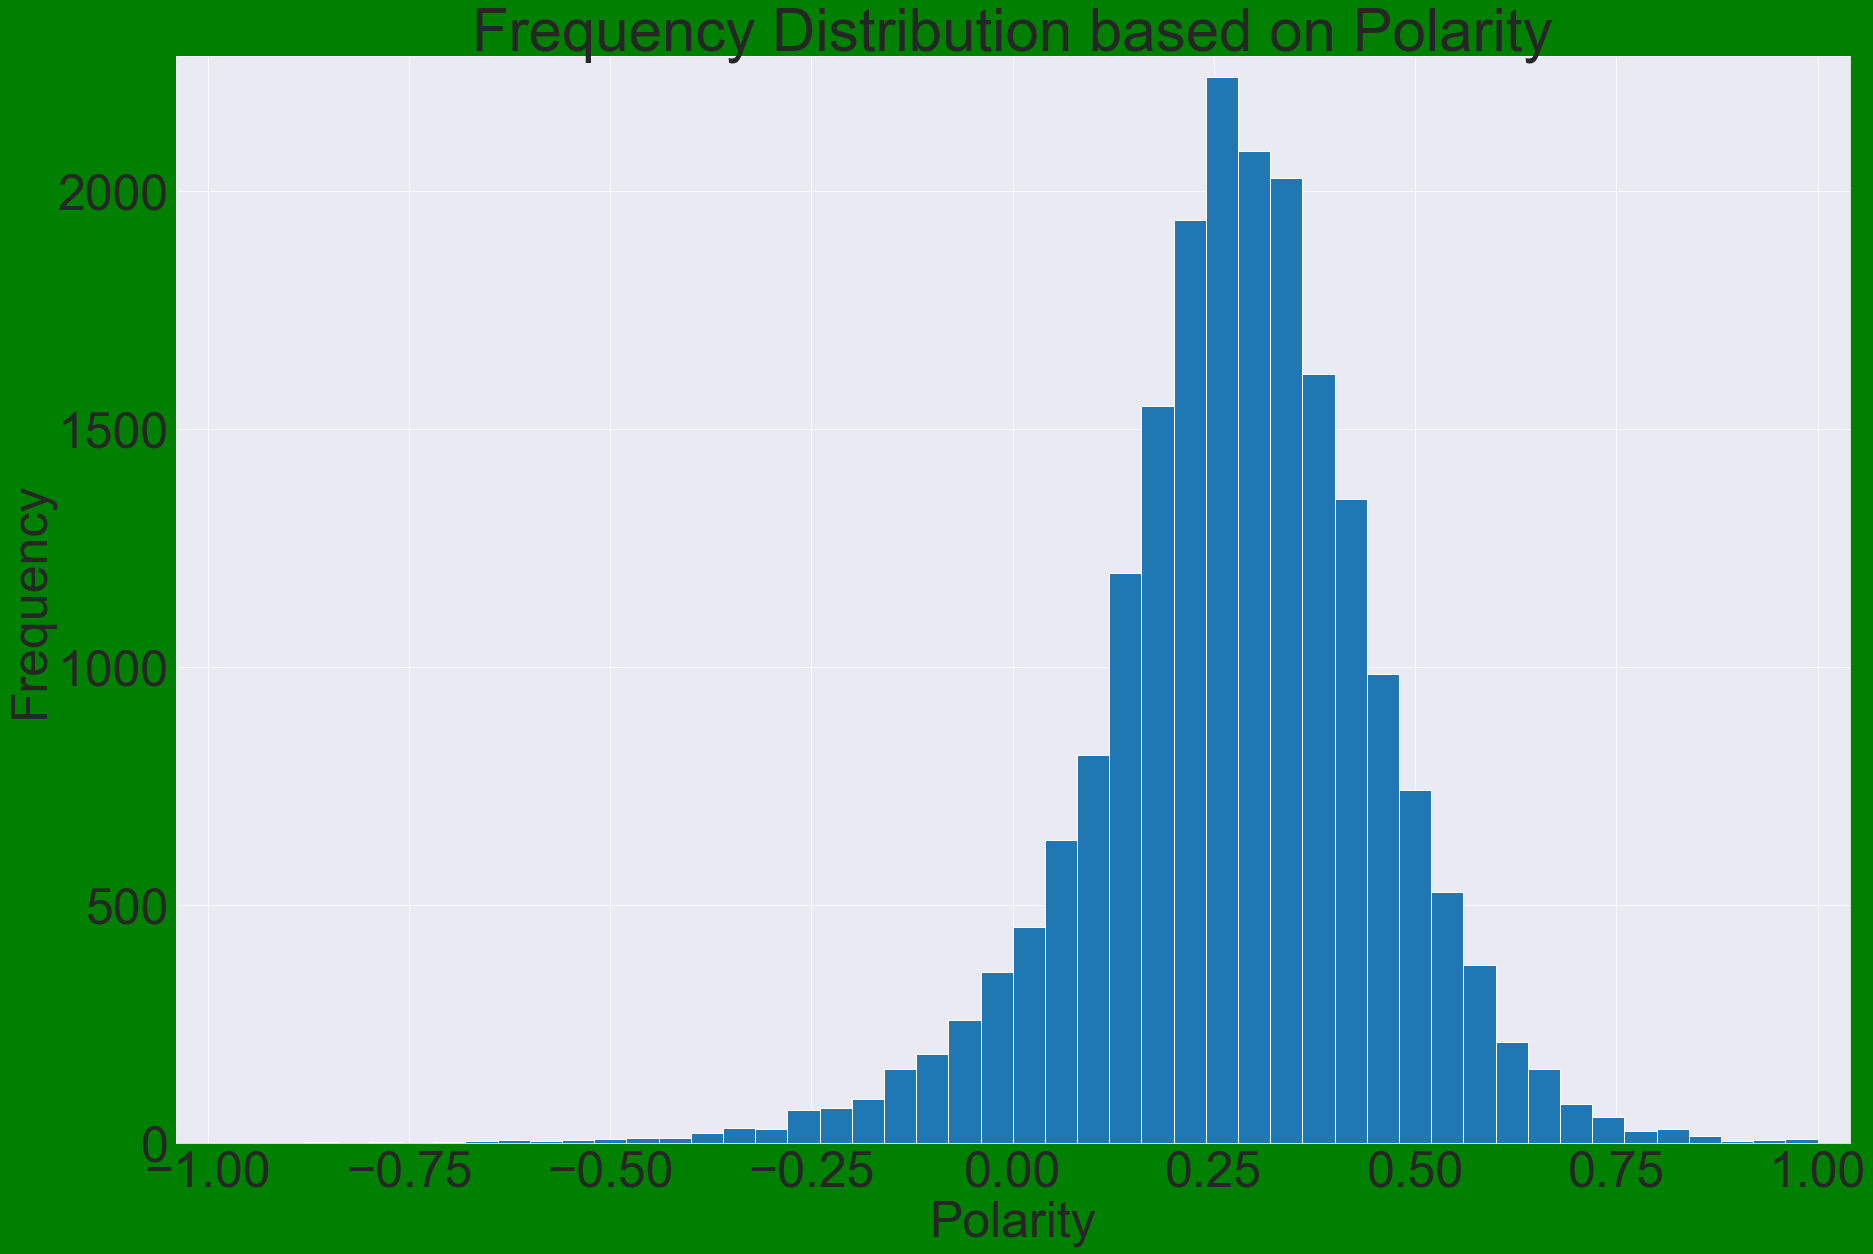

In [44]:
 #Frequency Distribution based on Polarity
plt.figure(figsize=(30,20),facecolor="green",edgecolor="orange")
plt.margins(0.02)
plt.xlabel("Polarity",fontsize=50)
plt.xticks(fontsize=50)
plt.ylabel("Frequency",fontsize=50)
plt.yticks(fontsize=50)
plt.hist(df["Polarity"],bins=50)
plt.title("Frequency Distribution based on Polarity",fontsize=60)
plt.show()


<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='Rating'>

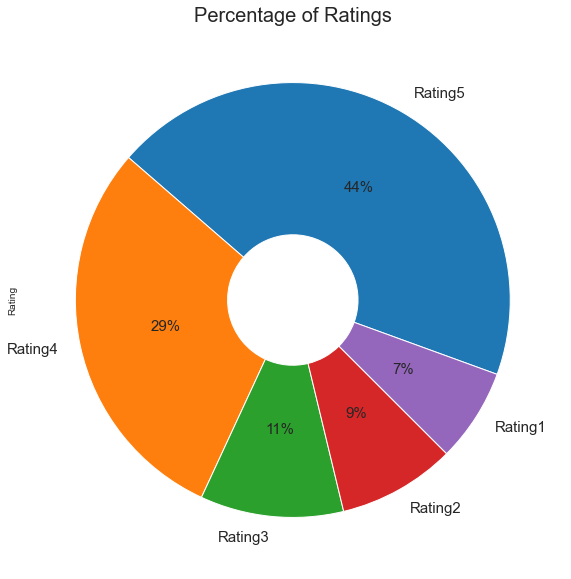

In [45]:
#Pie plot of percentage of ratings
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.Rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,
                              textprops={'fontsize': 15})


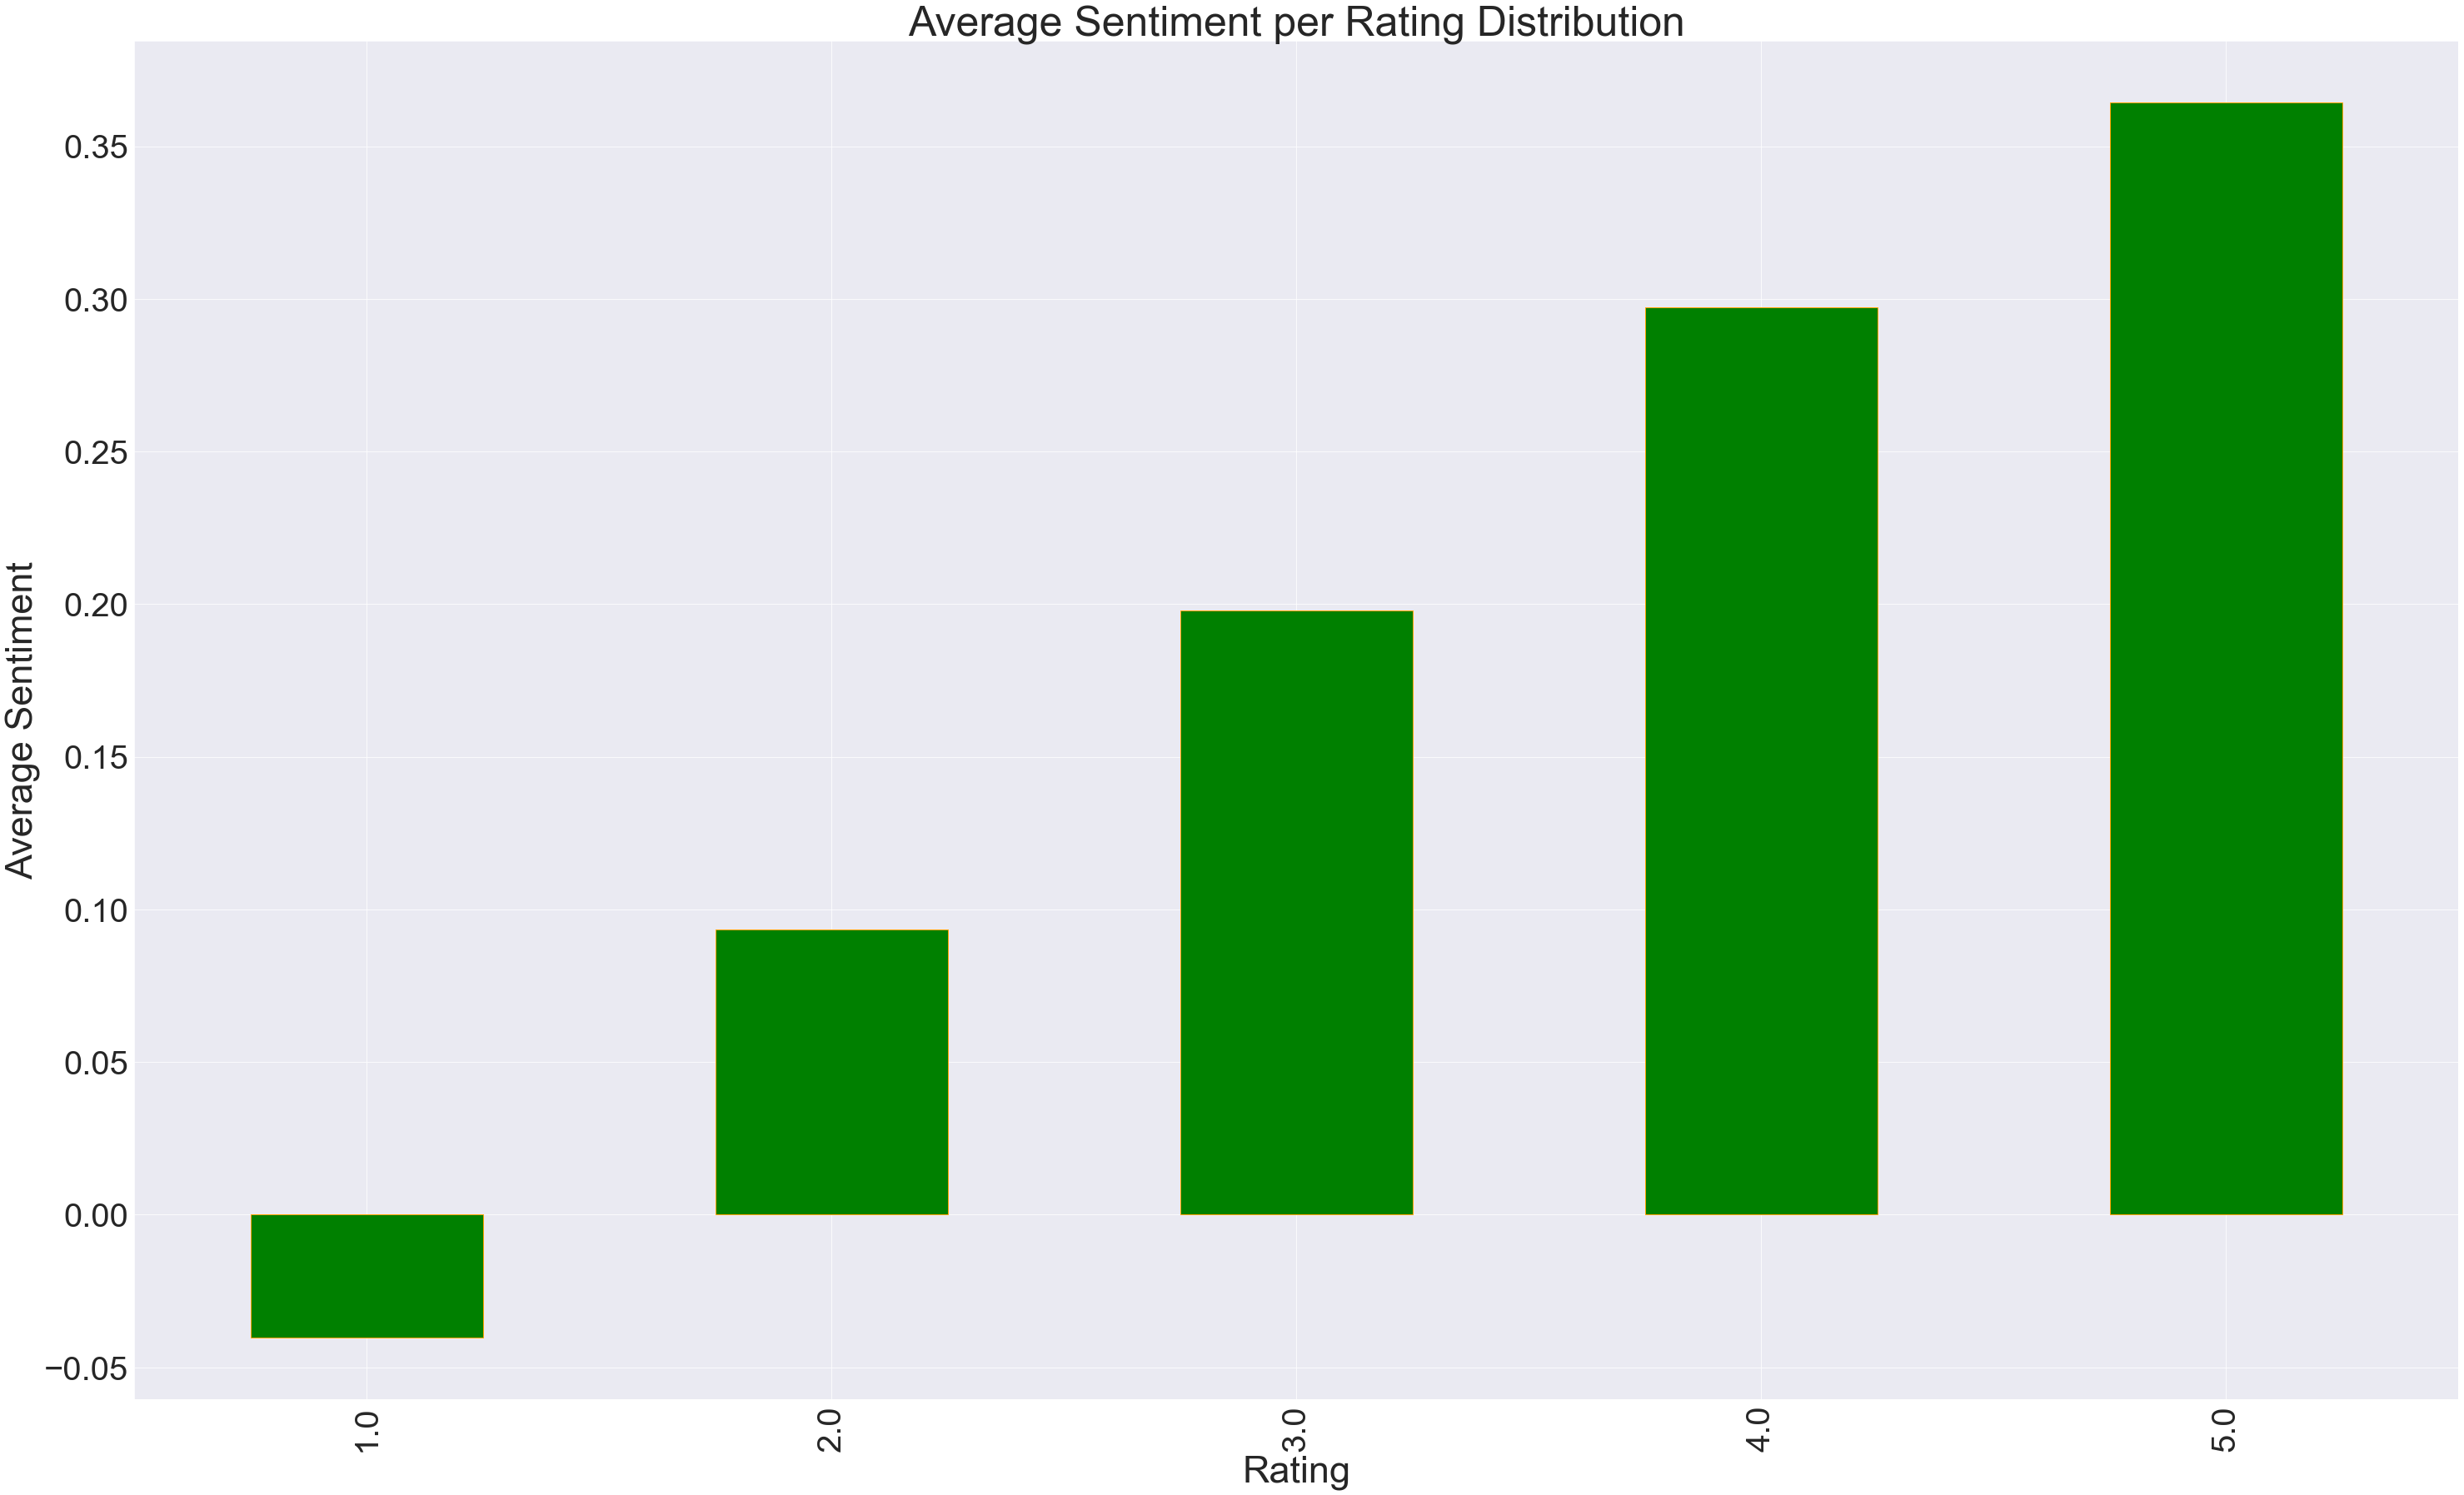

In [46]:
#Sentiment distribution based on ratings
polarity_avg = df.groupby('Rating')['Polarity'].mean().plot(kind='bar', figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()


In [47]:
#Counting no of words in each review
df["Word Count"]=df["Cleaned_Review_Lemmatized"].apply(lambda x:len(str(x).split()))


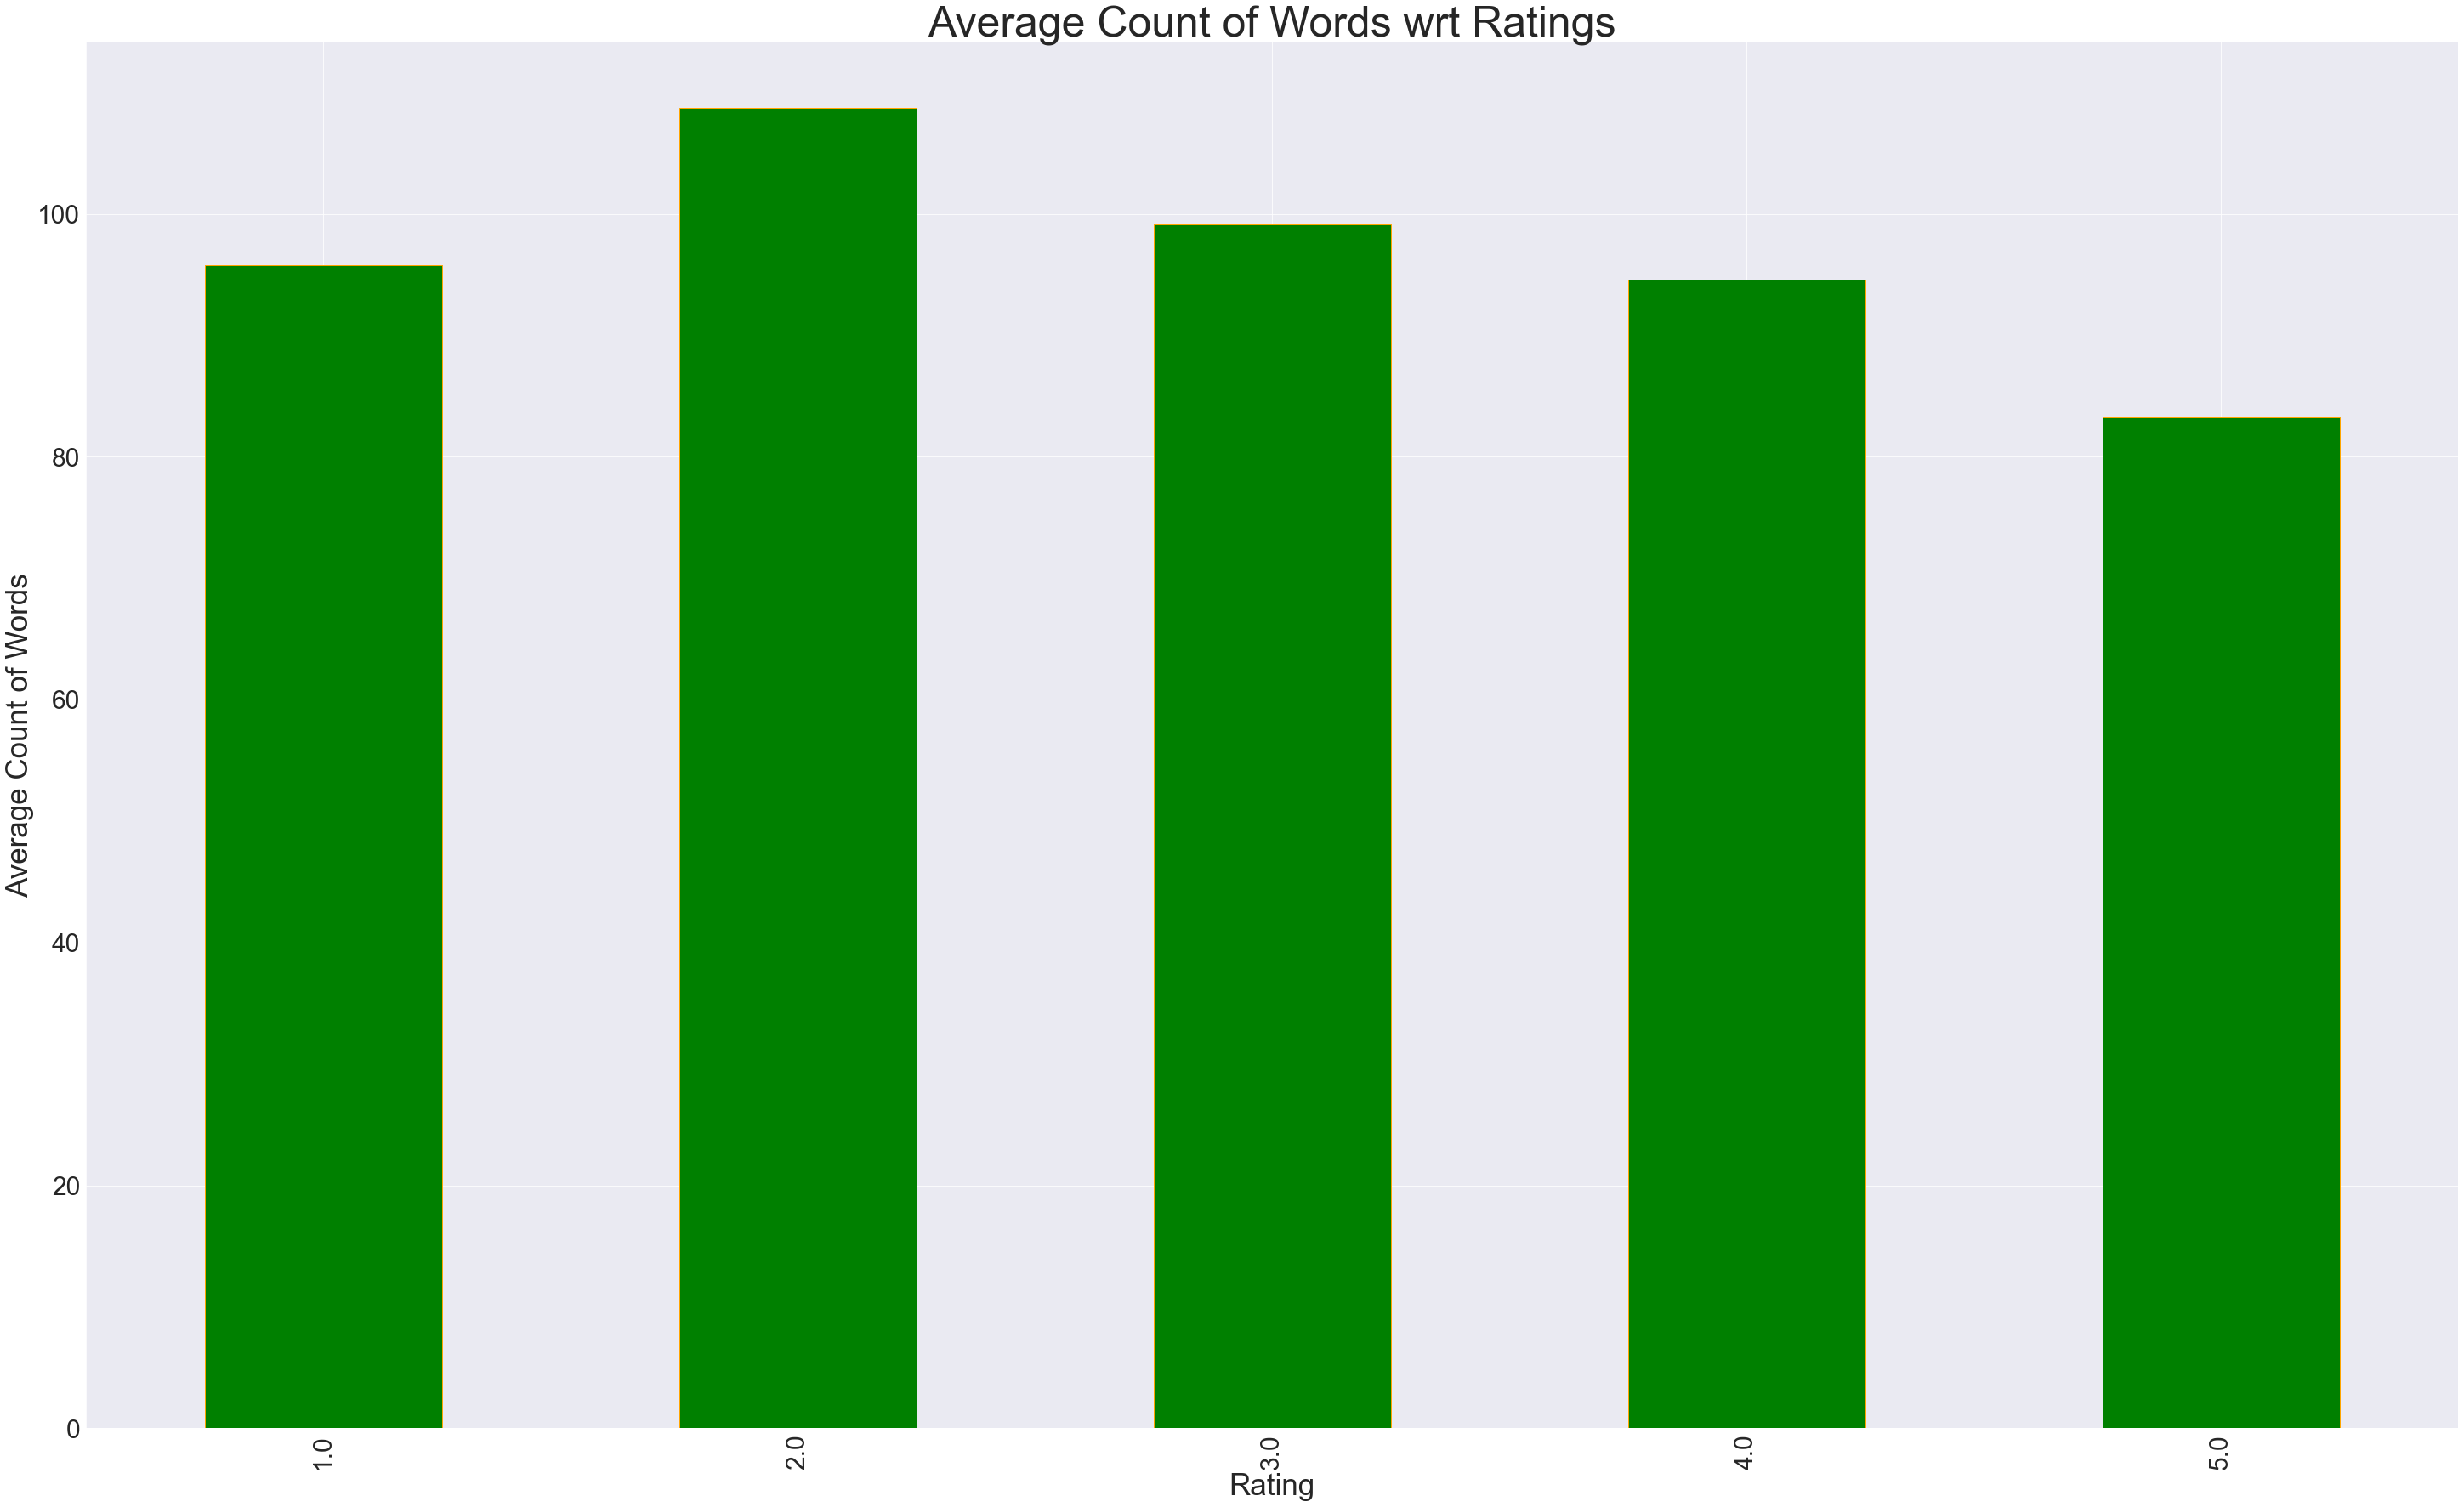

In [48]:
#Average no of words wrt ratings
word_avg=df.groupby("Rating")["Word Count"].mean().plot(kind="bar",figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel('Rating',fontsize=35)
plt.ylabel("Average Count of Words",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Average Count of Words wrt Ratings",fontsize=50)
plt.show()


In [49]:
#Counting no of letters in each review
df['review_len'] = df['Cleaned_Review_Lemmatized'].astype(str).apply(len)


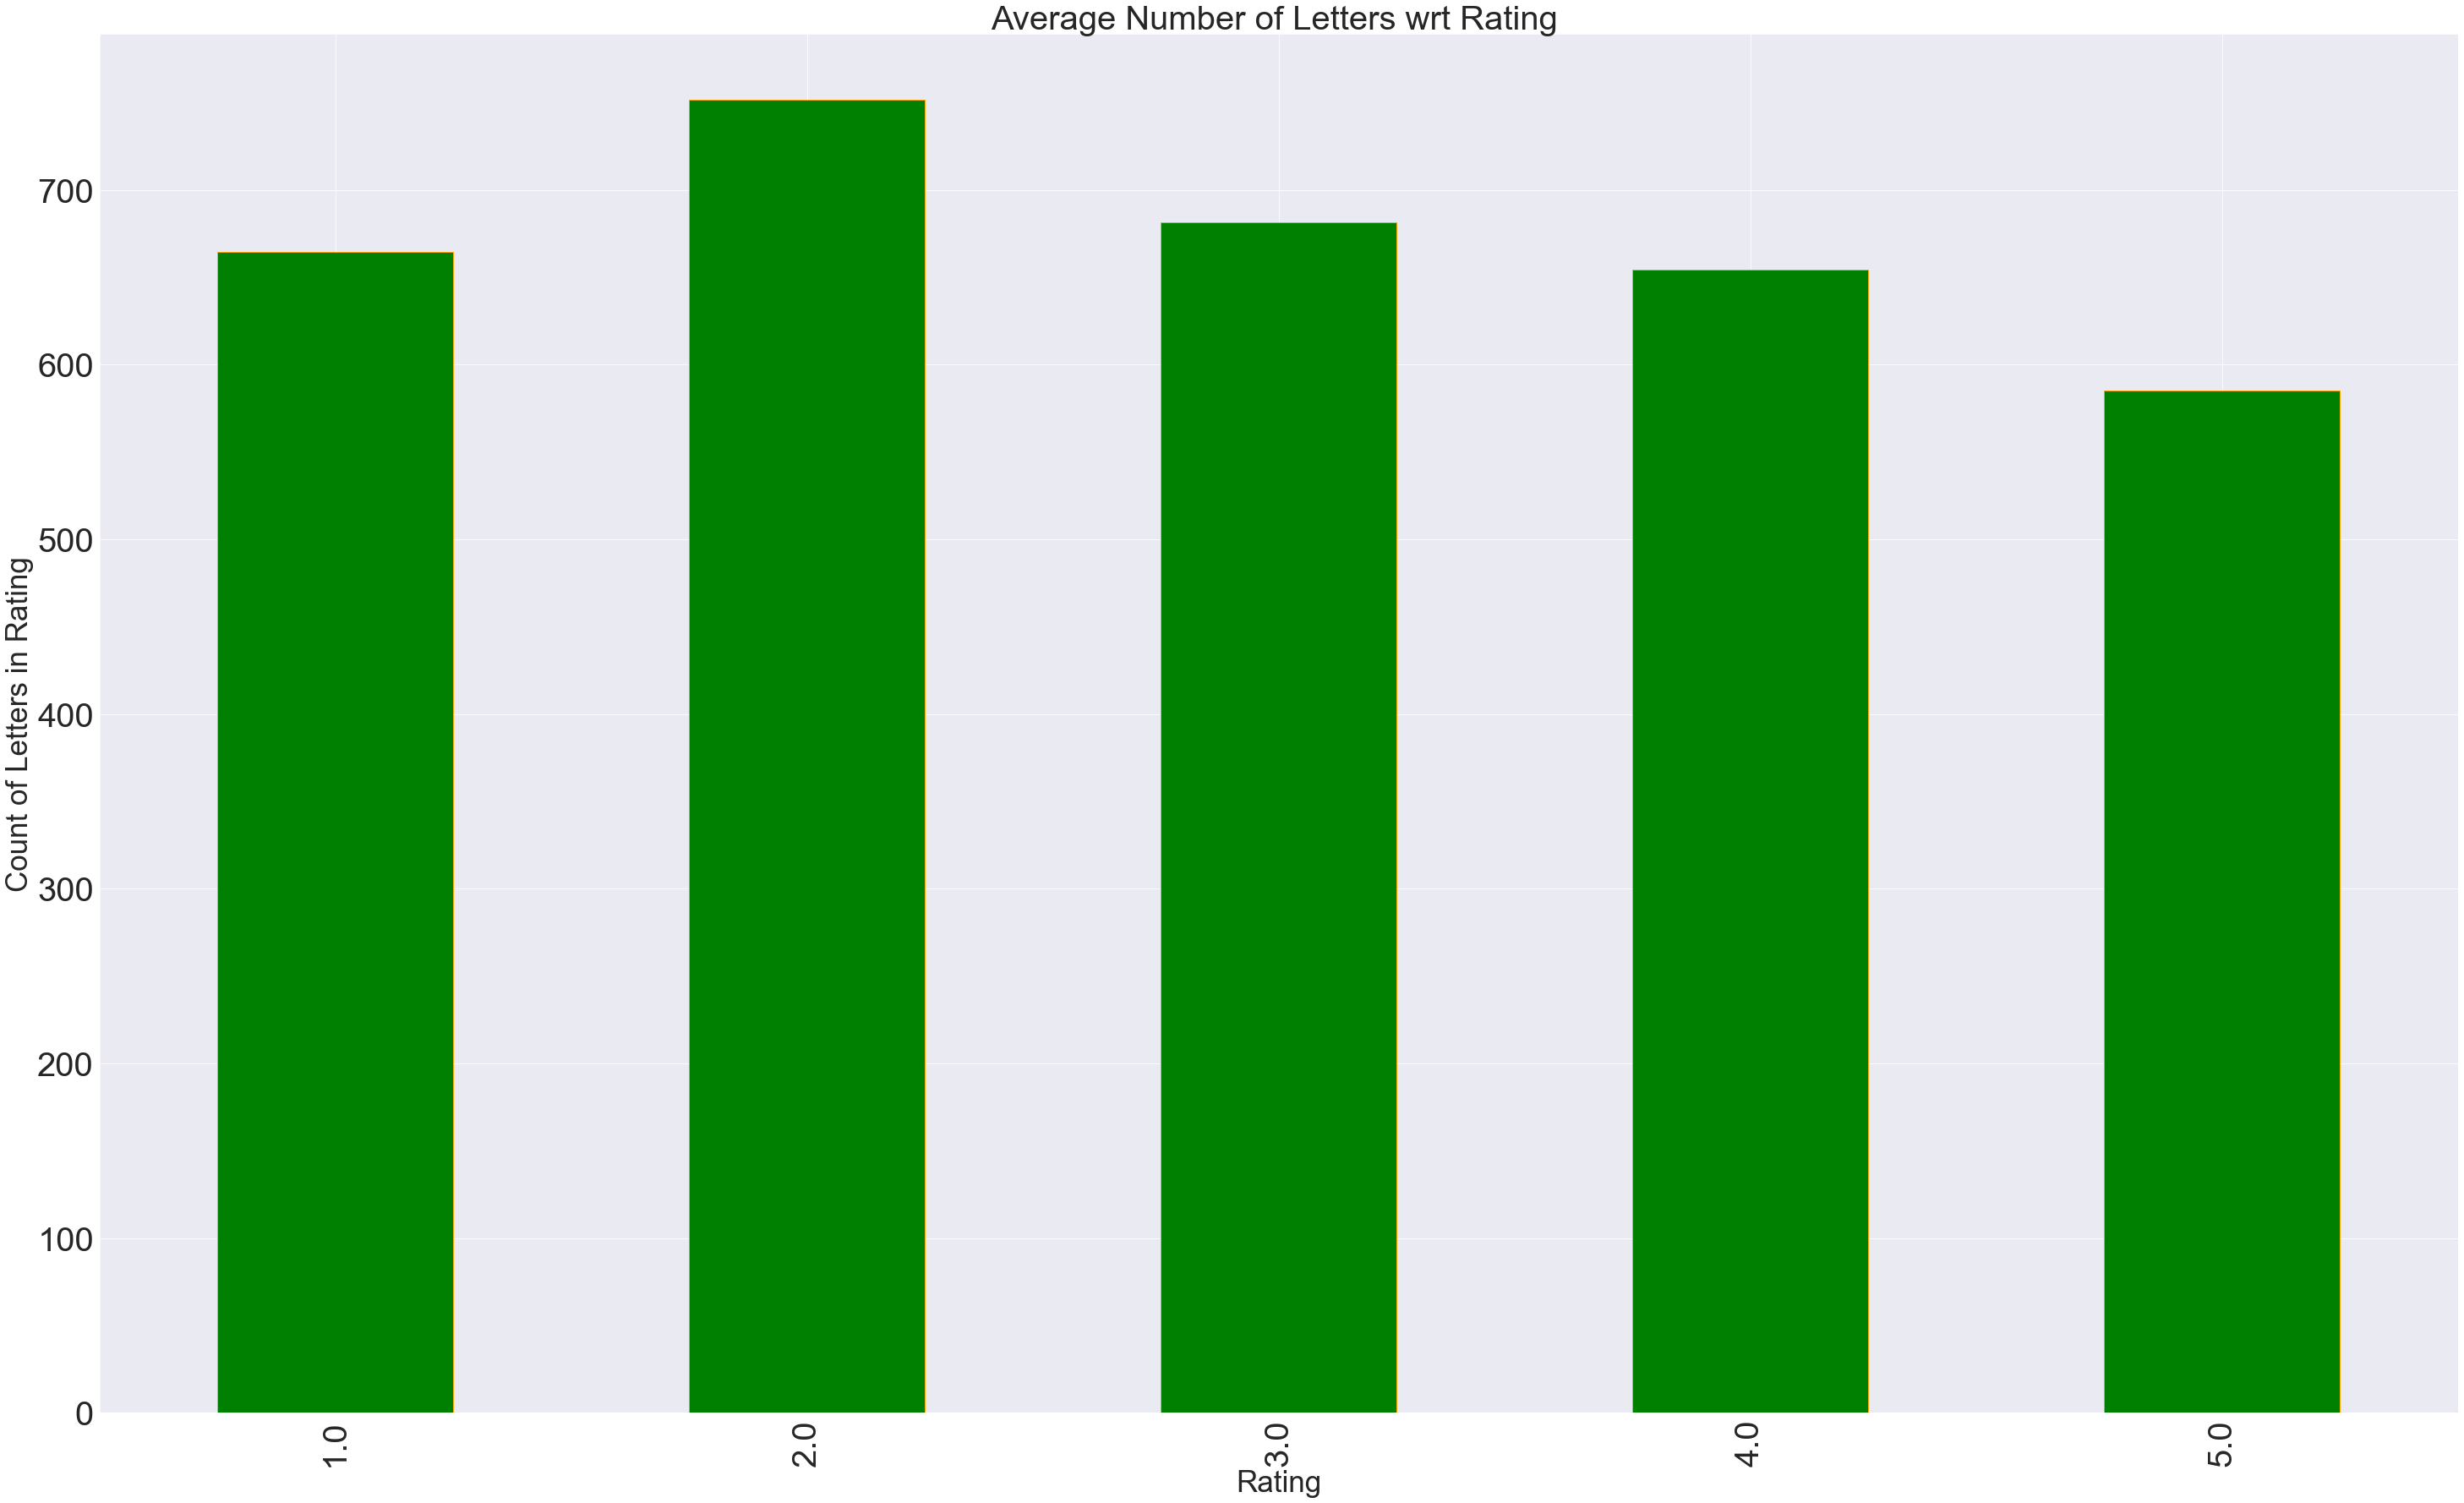

In [50]:
#Average no of letters wrt ratings
letter_avg = df.groupby('Rating')['review_len'].mean().plot(kind='bar', figsize=(50,30),color="green",edgecolor="orange")
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters wrt Rating ', fontsize=40)
plt.show()


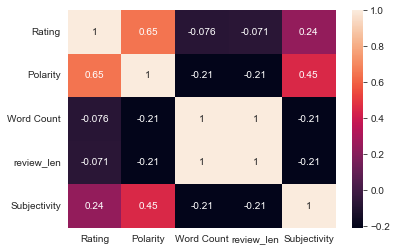

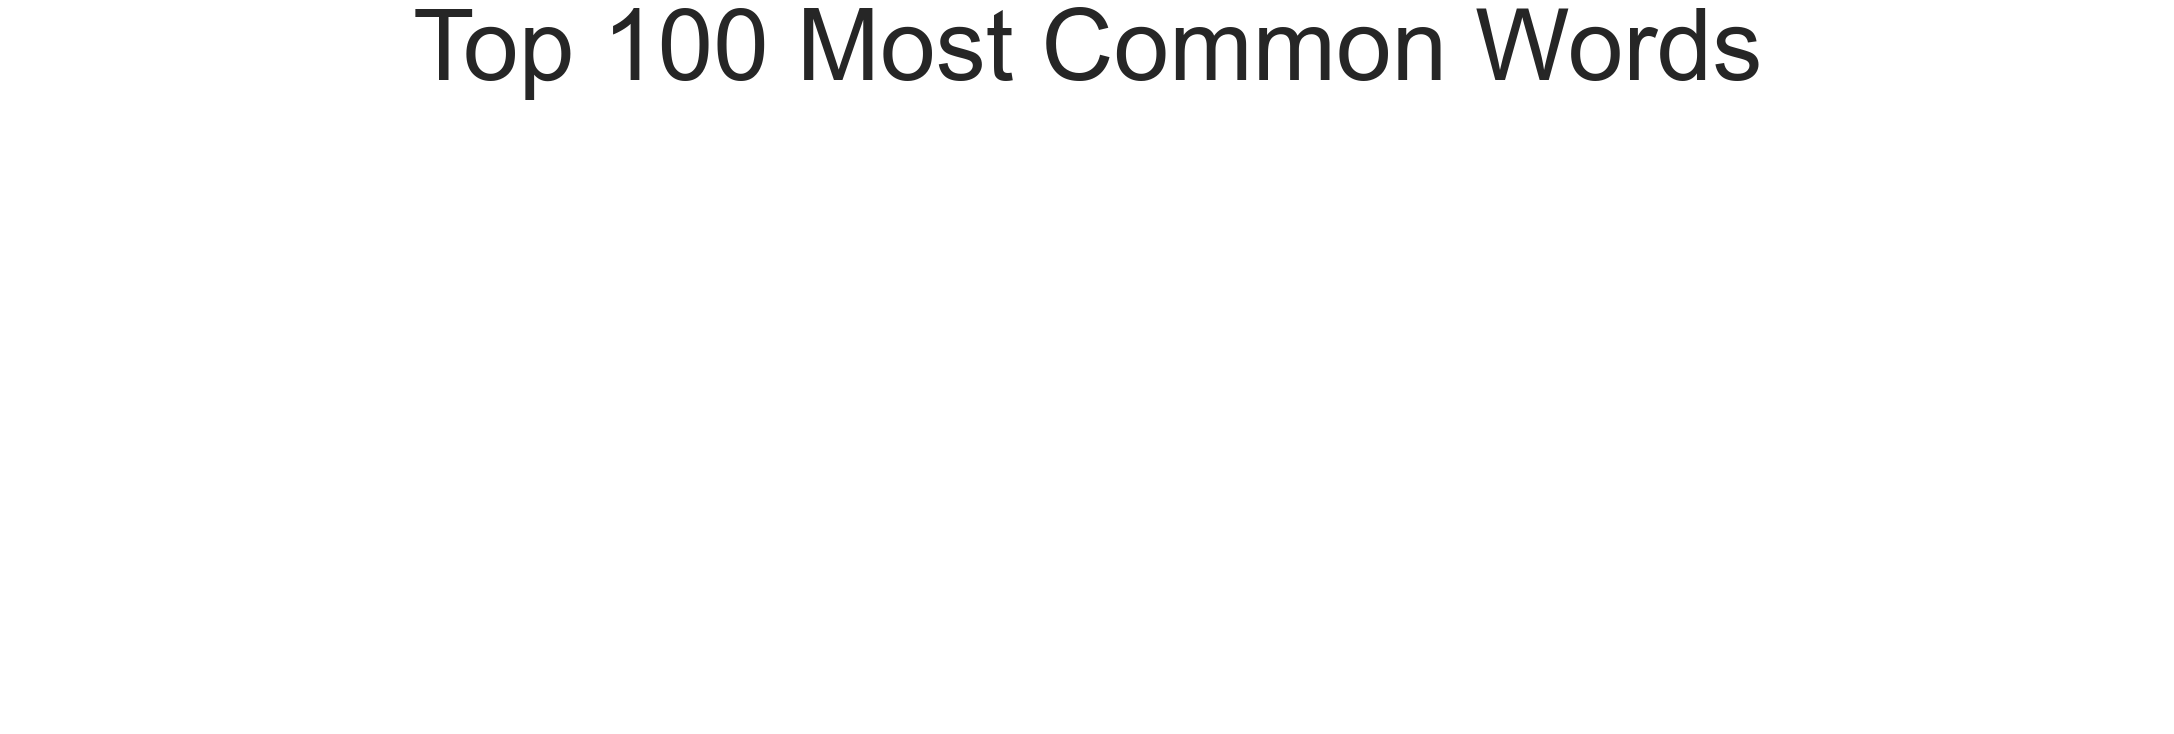

In [51]:
#Corelation of features
corelation=df[["Rating","Polarity","Word Count","review_len","Subjectivity"]].corr()

sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)


#Counting 100 most common words in our data
from nltk.probability import FreqDist
mostcommon = FreqDist(df["Cleaned_Review_Lemmatized"]).most_common(100)

fig = plt.figure(figsize=(30,10), facecolor='white')
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()





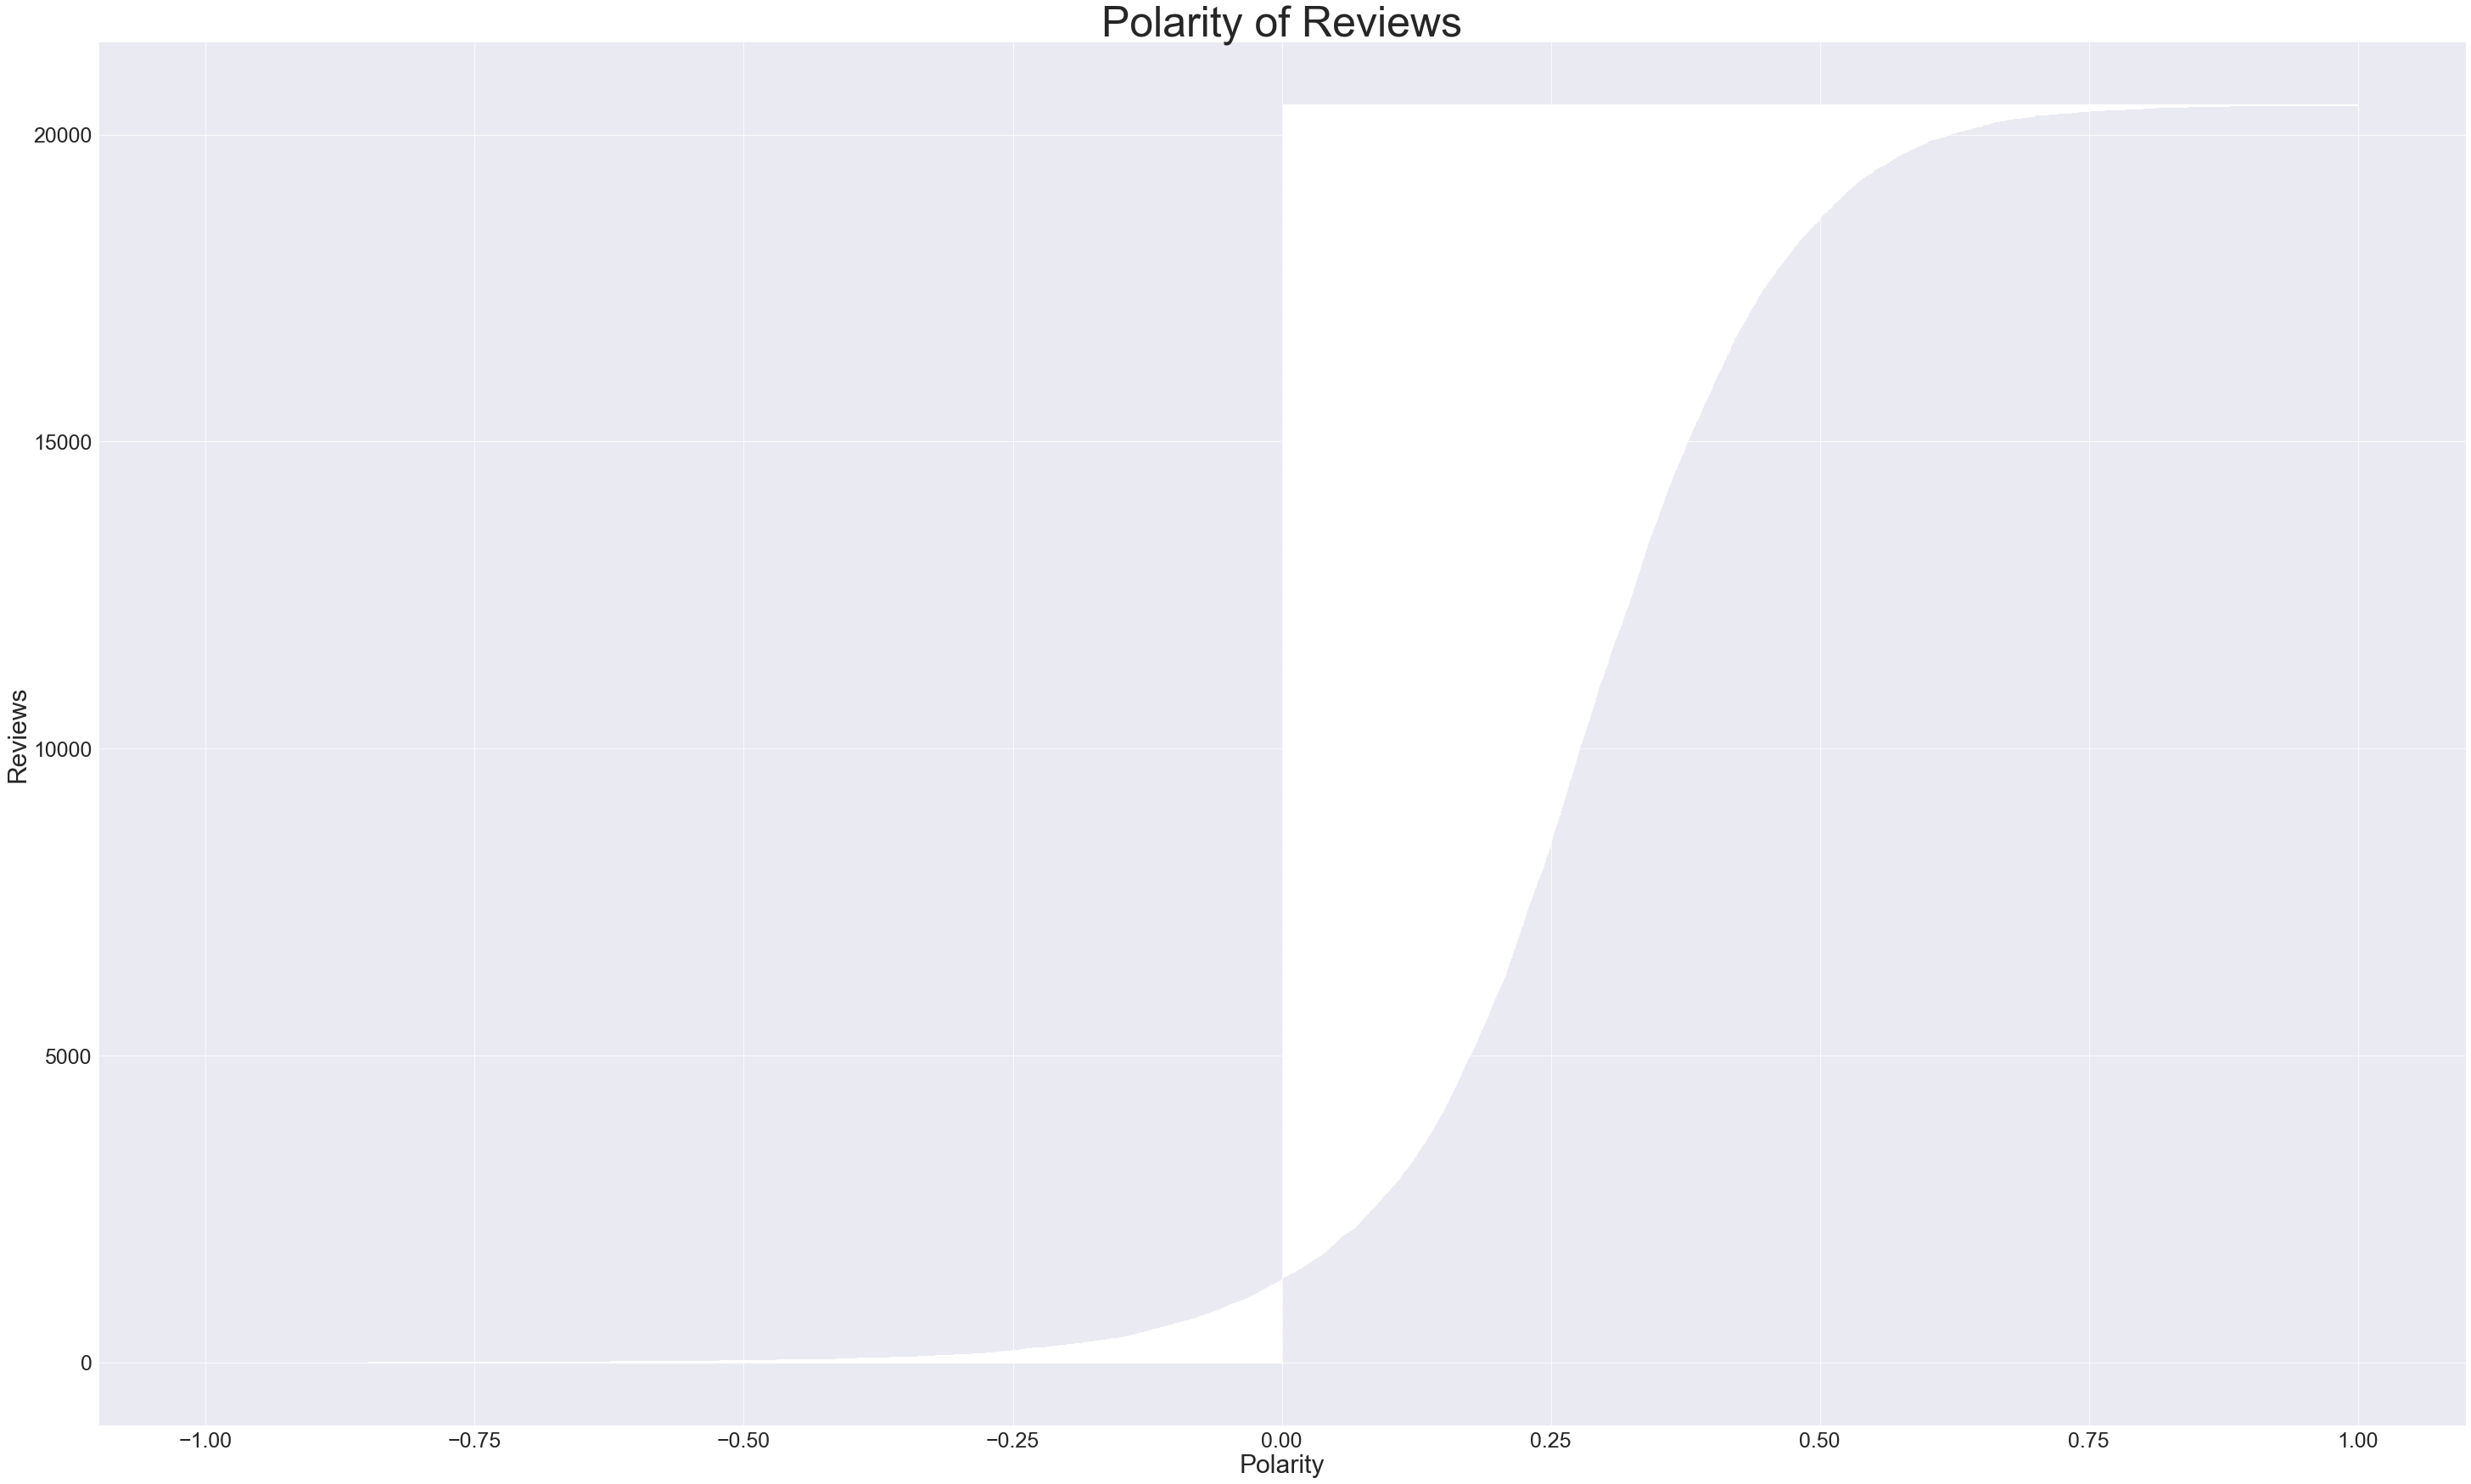

In [52]:
polarity_positive_data=pd.DataFrame(df.groupby("Cleaned_Reviews")["Polarity"].mean().sort_values(ascending=True))

plt.figure(figsize=(50,30))
plt.xlabel('Polarity',fontsize=30)
plt.ylabel('Reviews',fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Polarity of Reviews',fontsize=50)
polarity_graph=plt.barh(np.arange(len(polarity_positive_data.index)),polarity_positive_data['Polarity'],color='purple',)



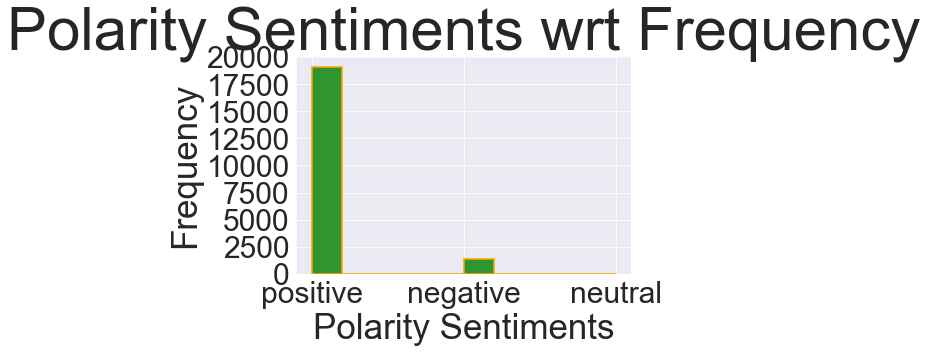

In [53]:
#categorizing reviews in positive,negative and neutral#
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

df['polarity_score']=df['Polarity'].\
   map(lambda x: sentiment(x))

plt.hist(df["polarity_score"],bins=10, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)
plt.xlabel("Polarity Sentiments",fontsize=35)
plt.ylabel("Frequency",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("Polarity Sentiments wrt Frequency",fontsize=60)
plt.show()


In [54]:
from collections import Counter

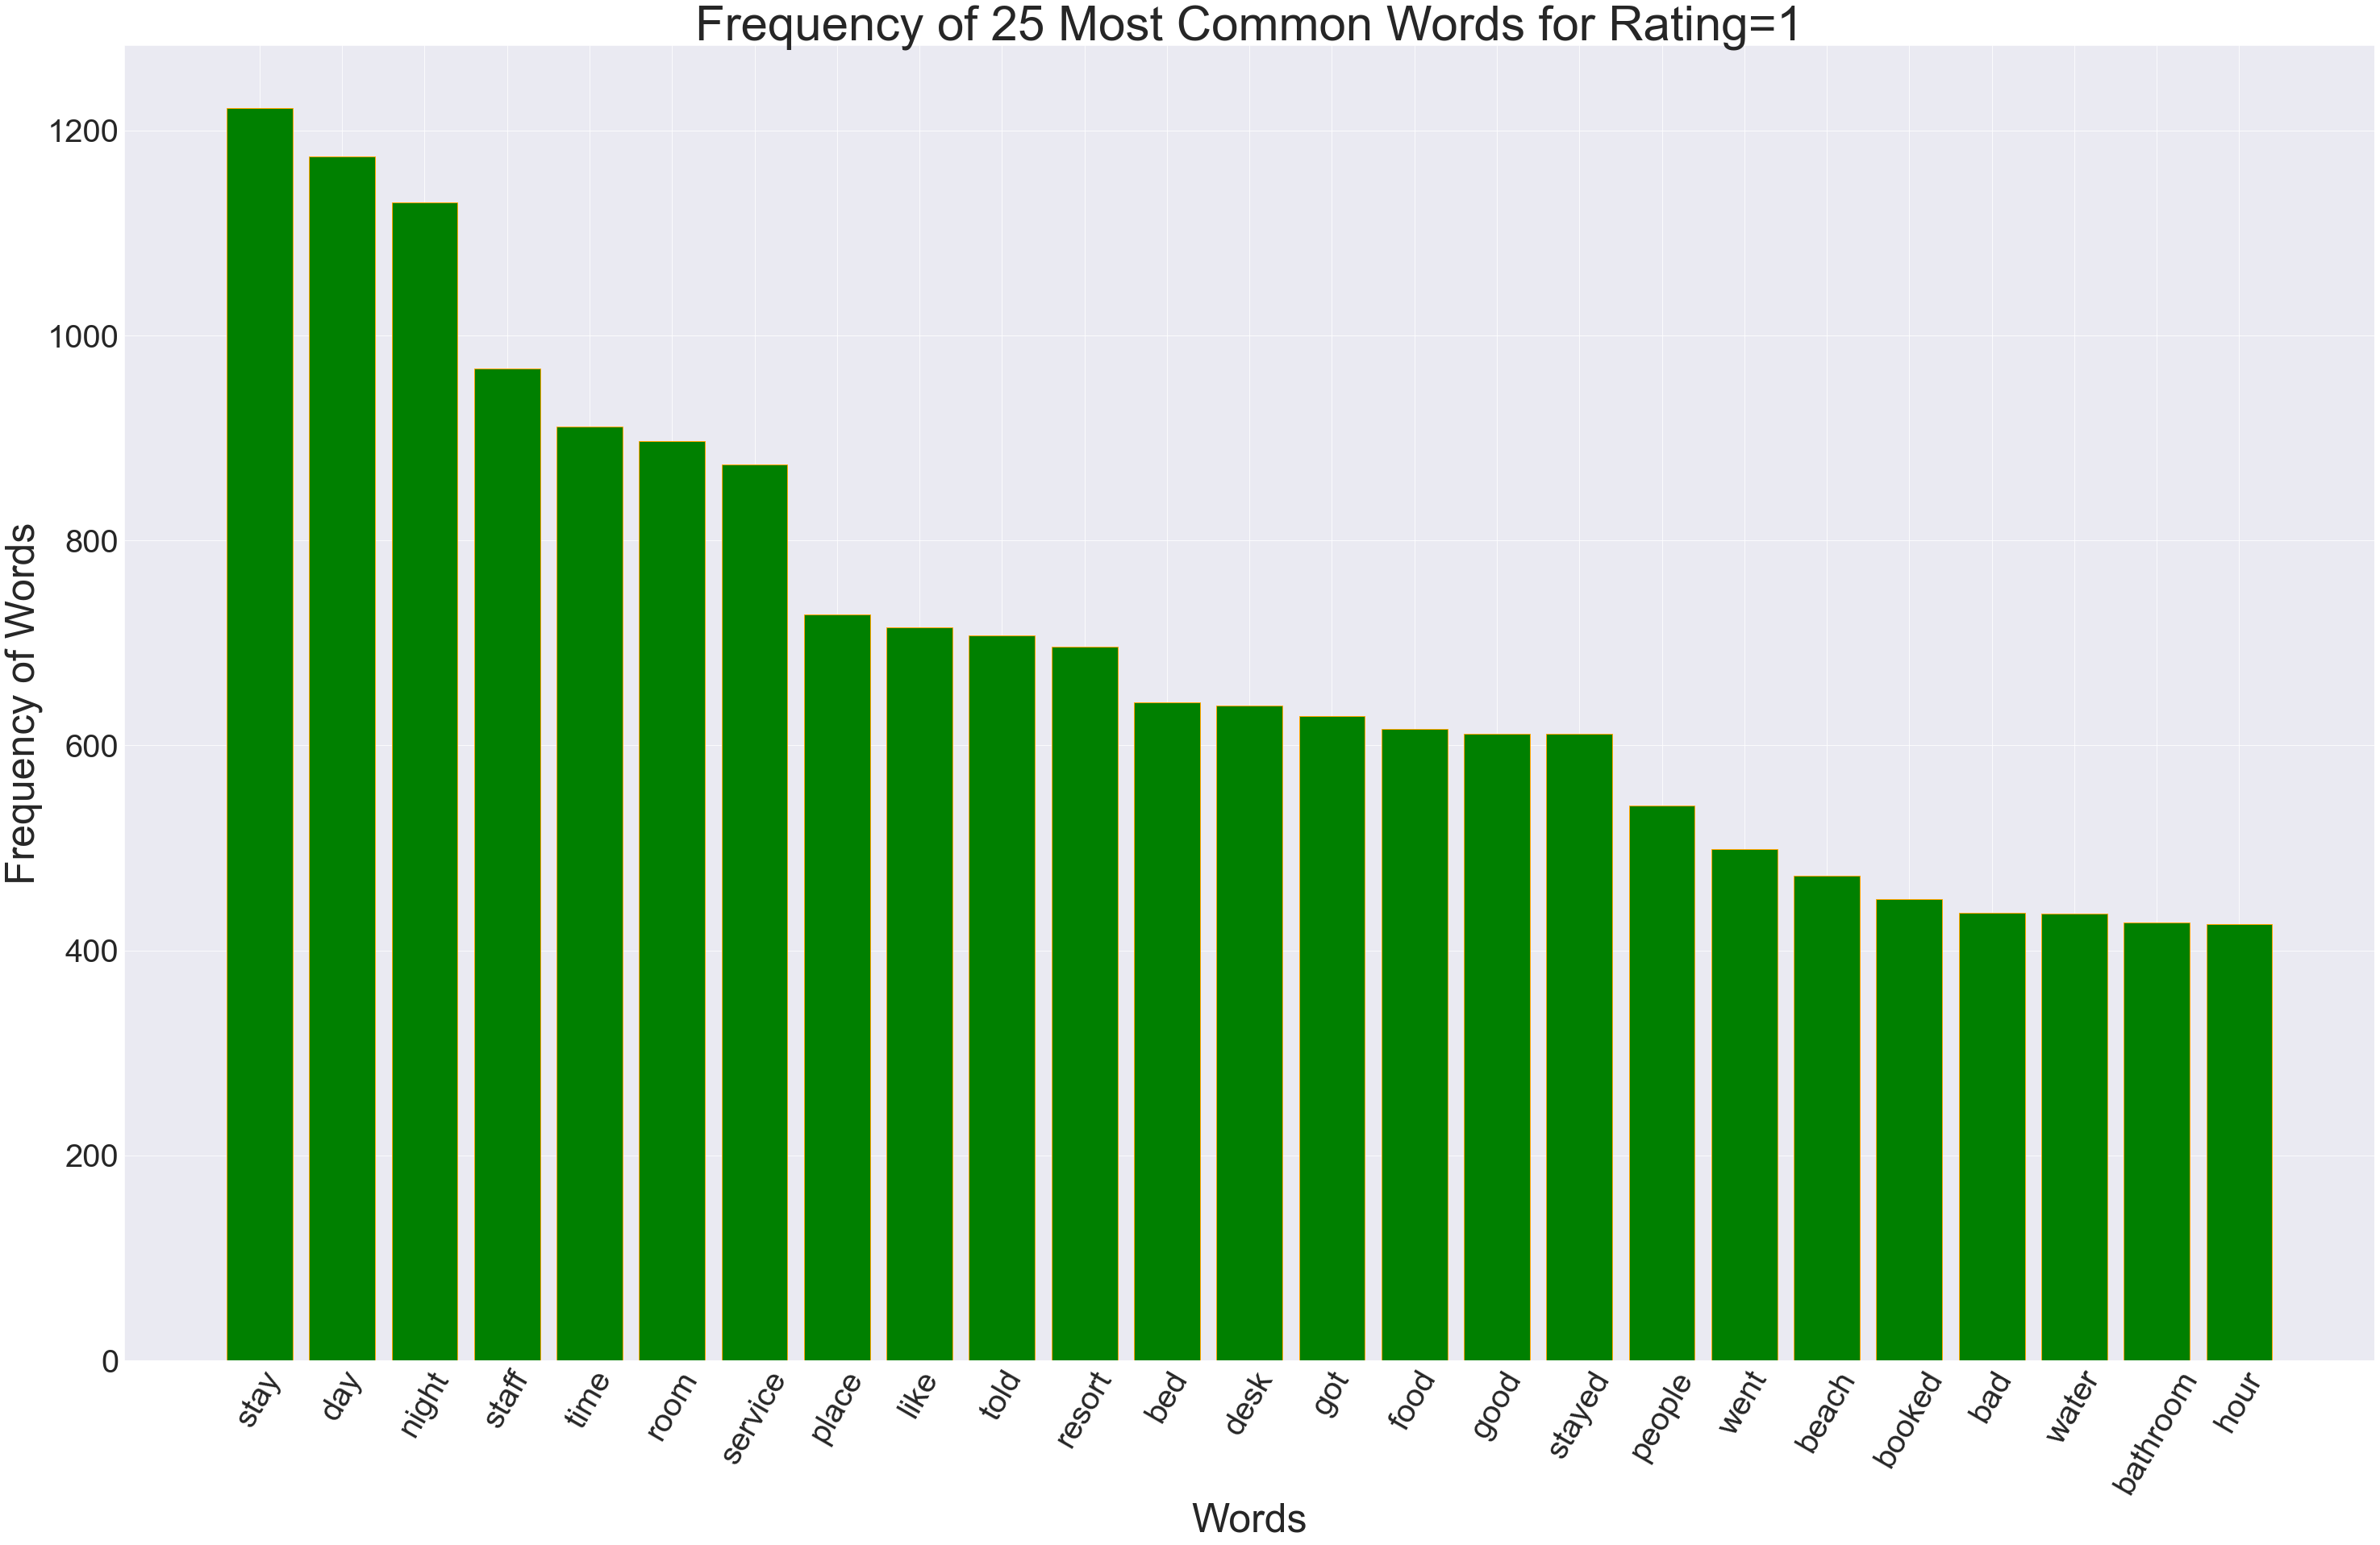

In [55]:
#Most frequent words for rating 1
group_by = df.groupby('Rating')['Cleaned_Review_Lemmatized'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()


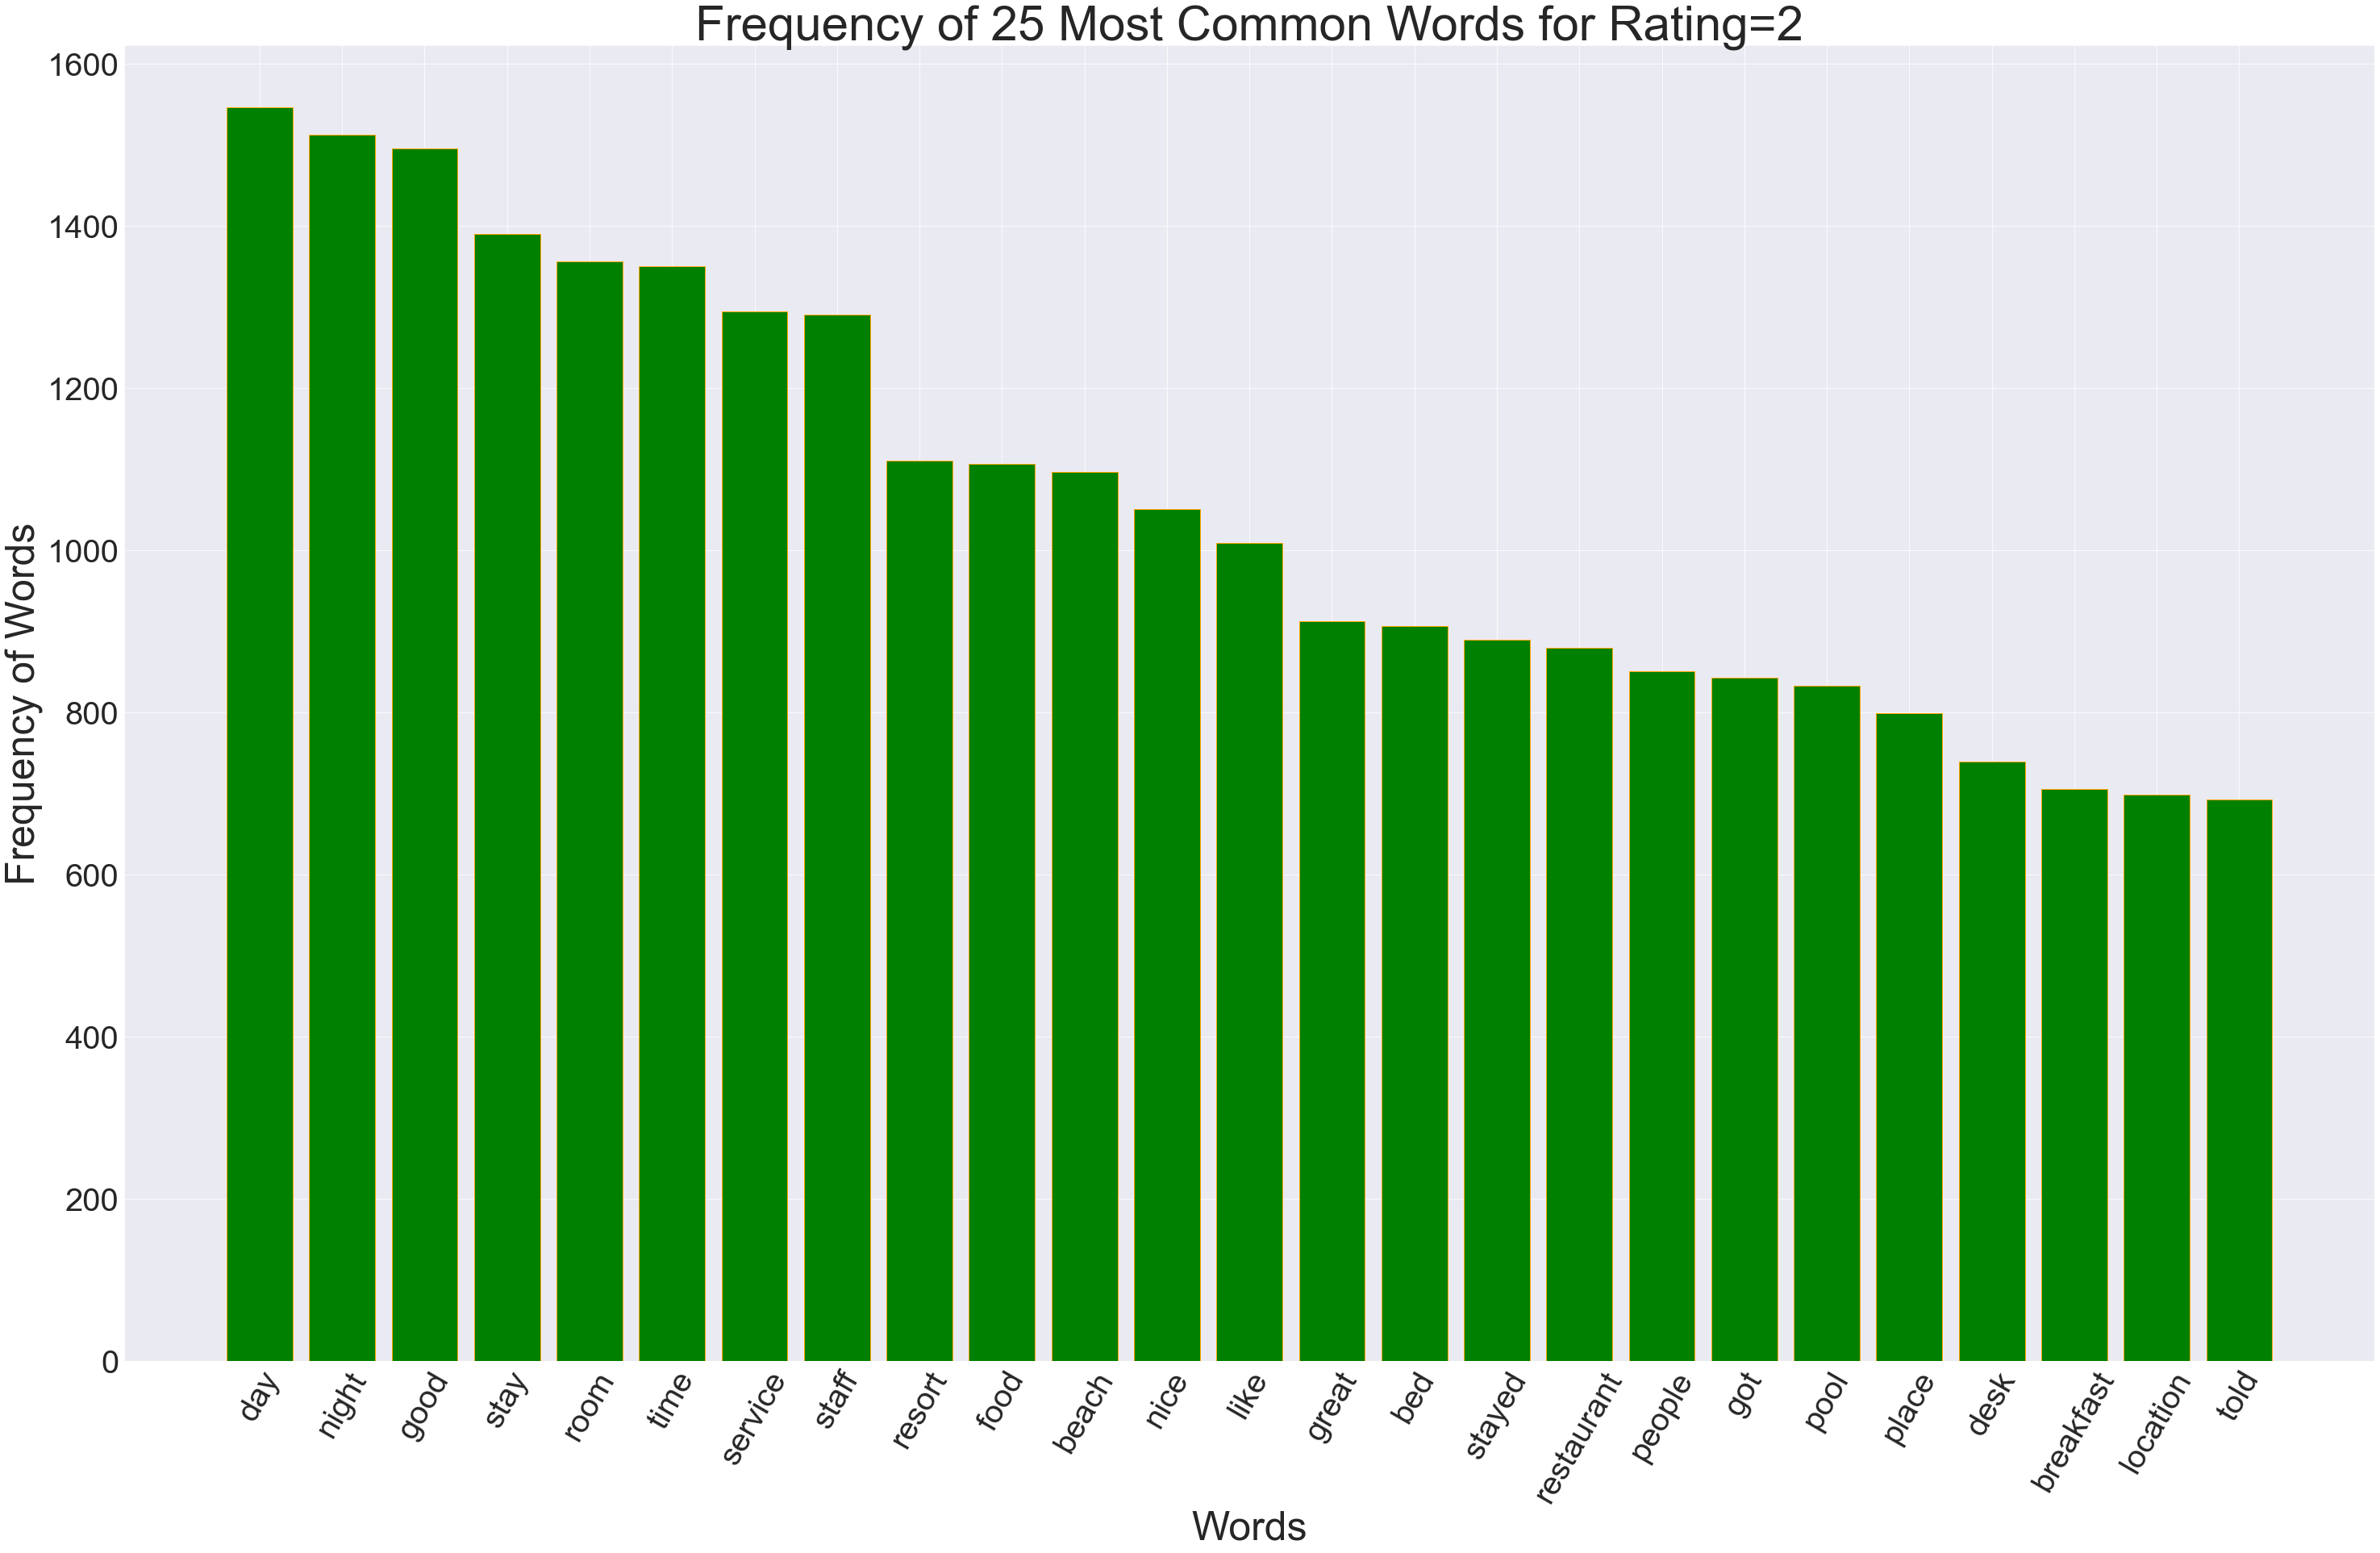

In [56]:
#Most frequent words for rating 2
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=2', fontsize=60)
plt.show()



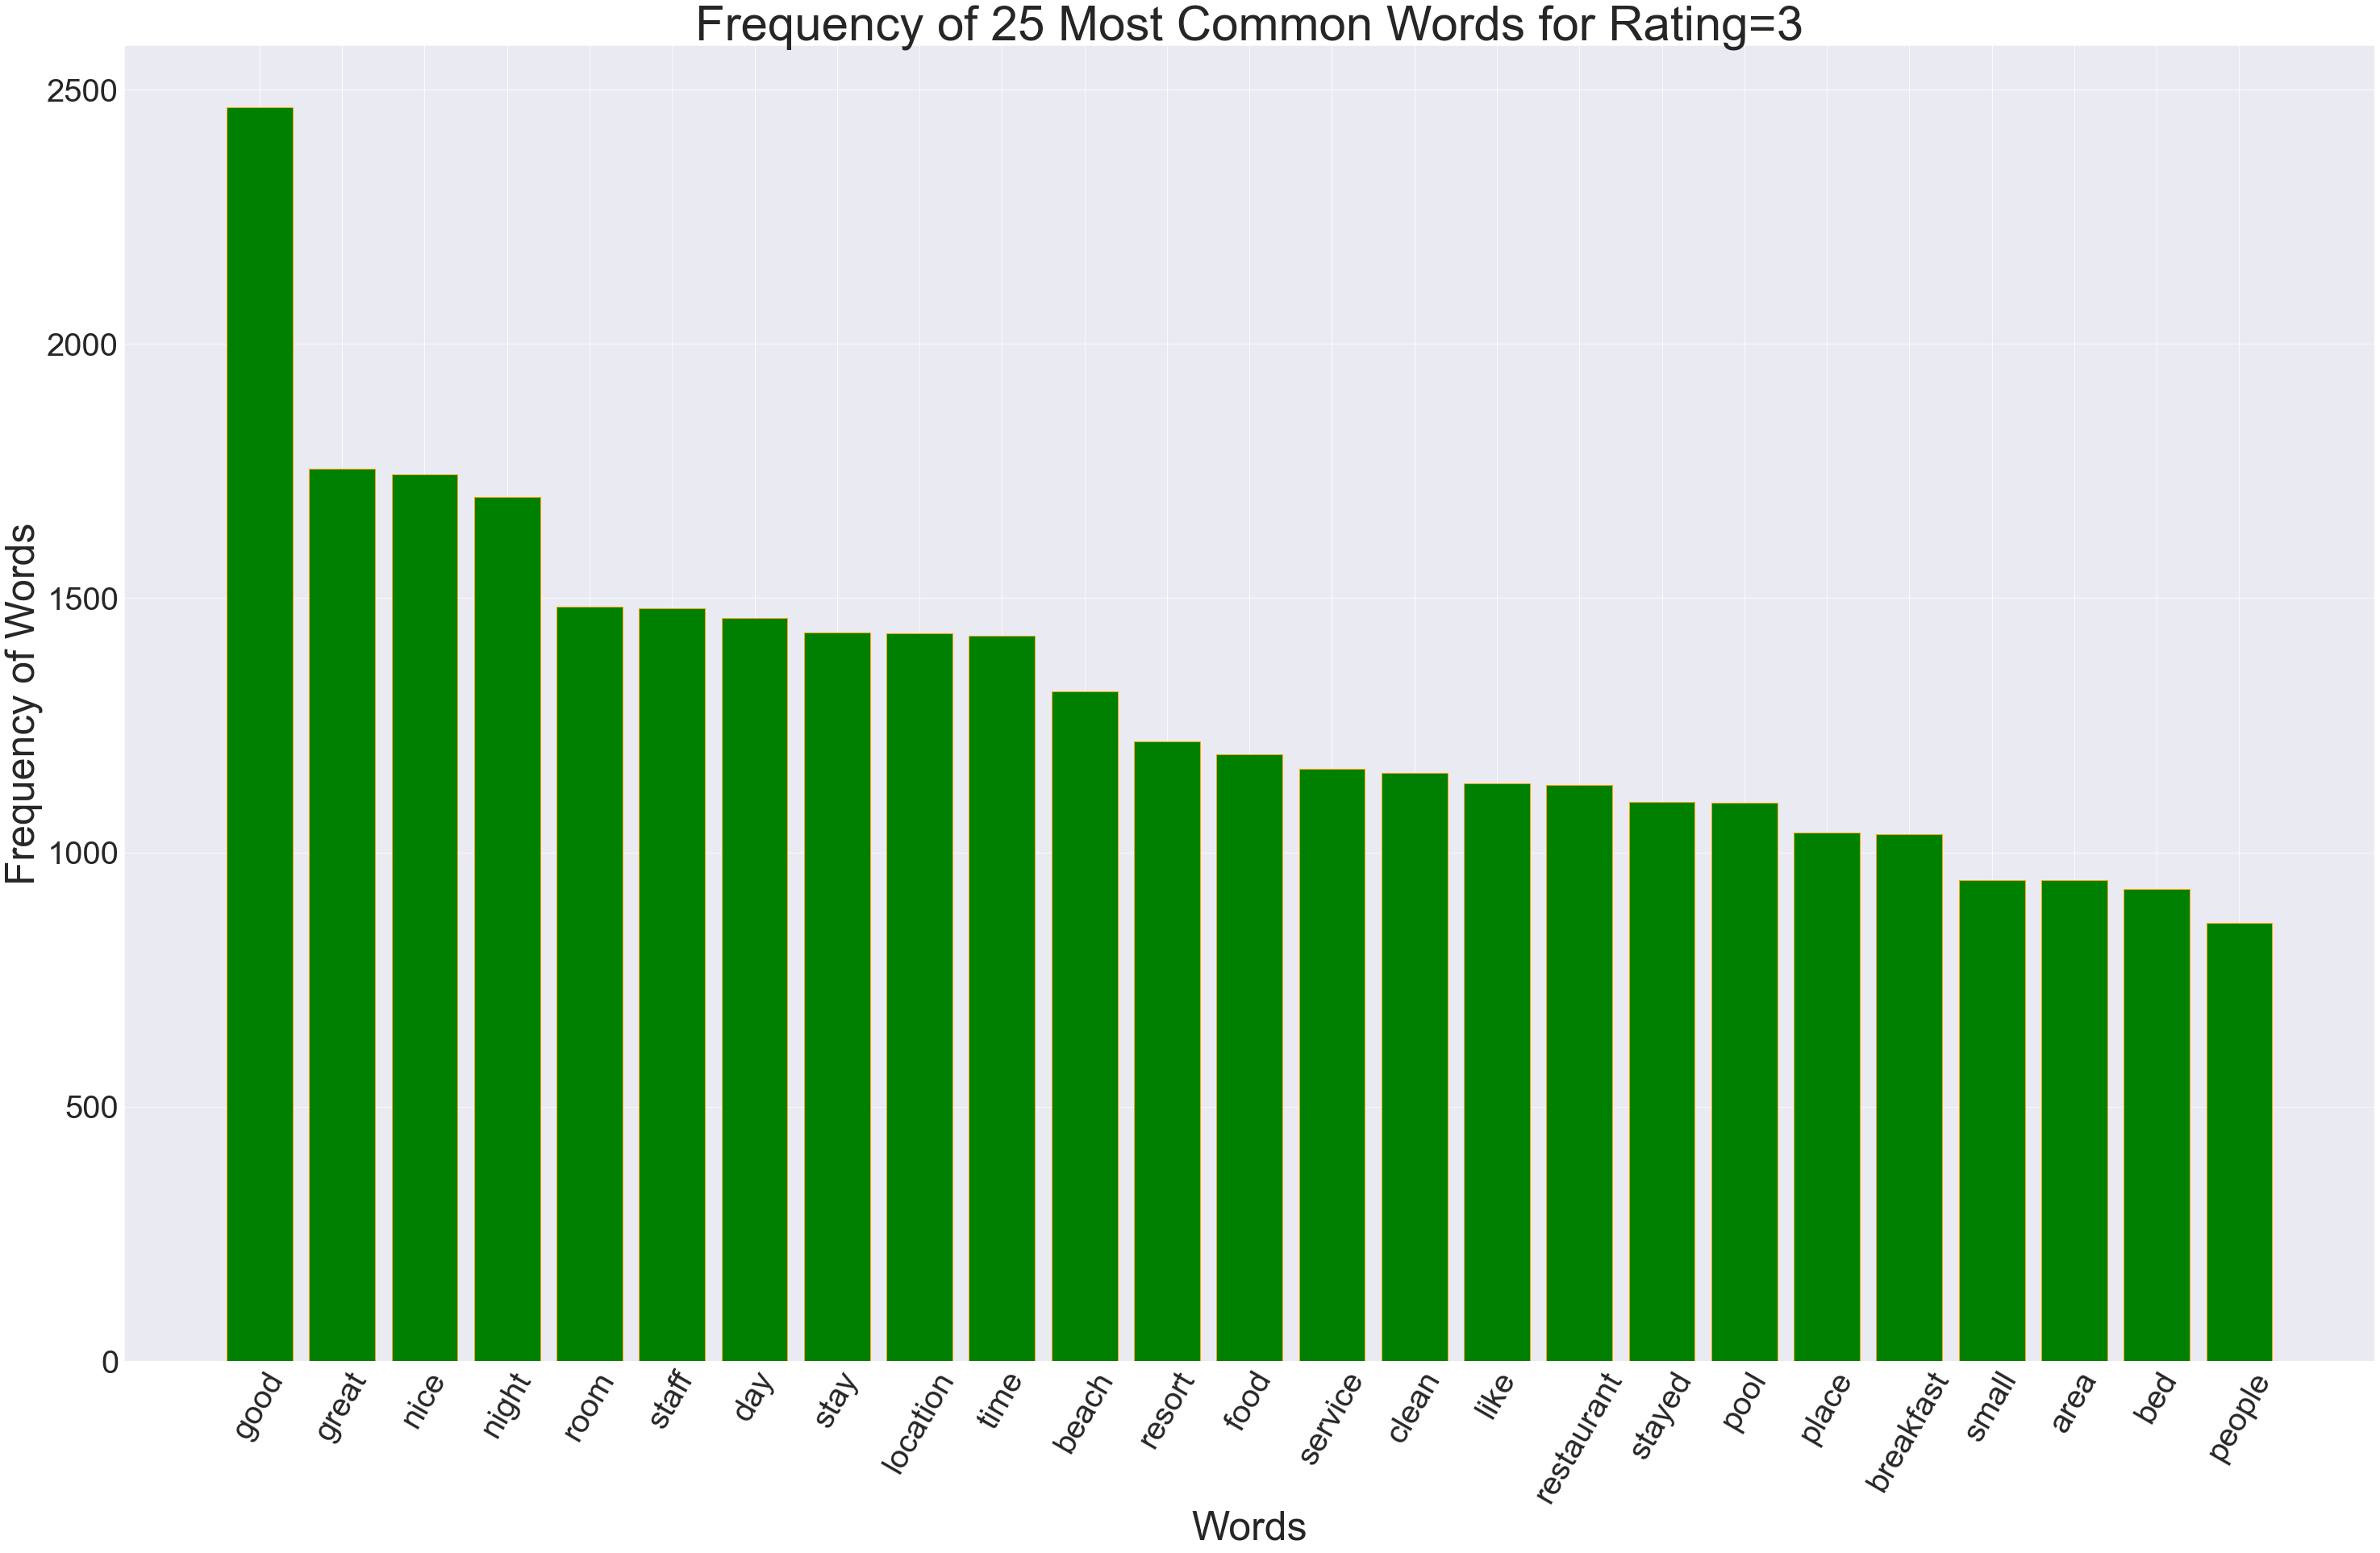

In [57]:
#Most frequent words for rating 3
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=3', fontsize=60)
plt.show()



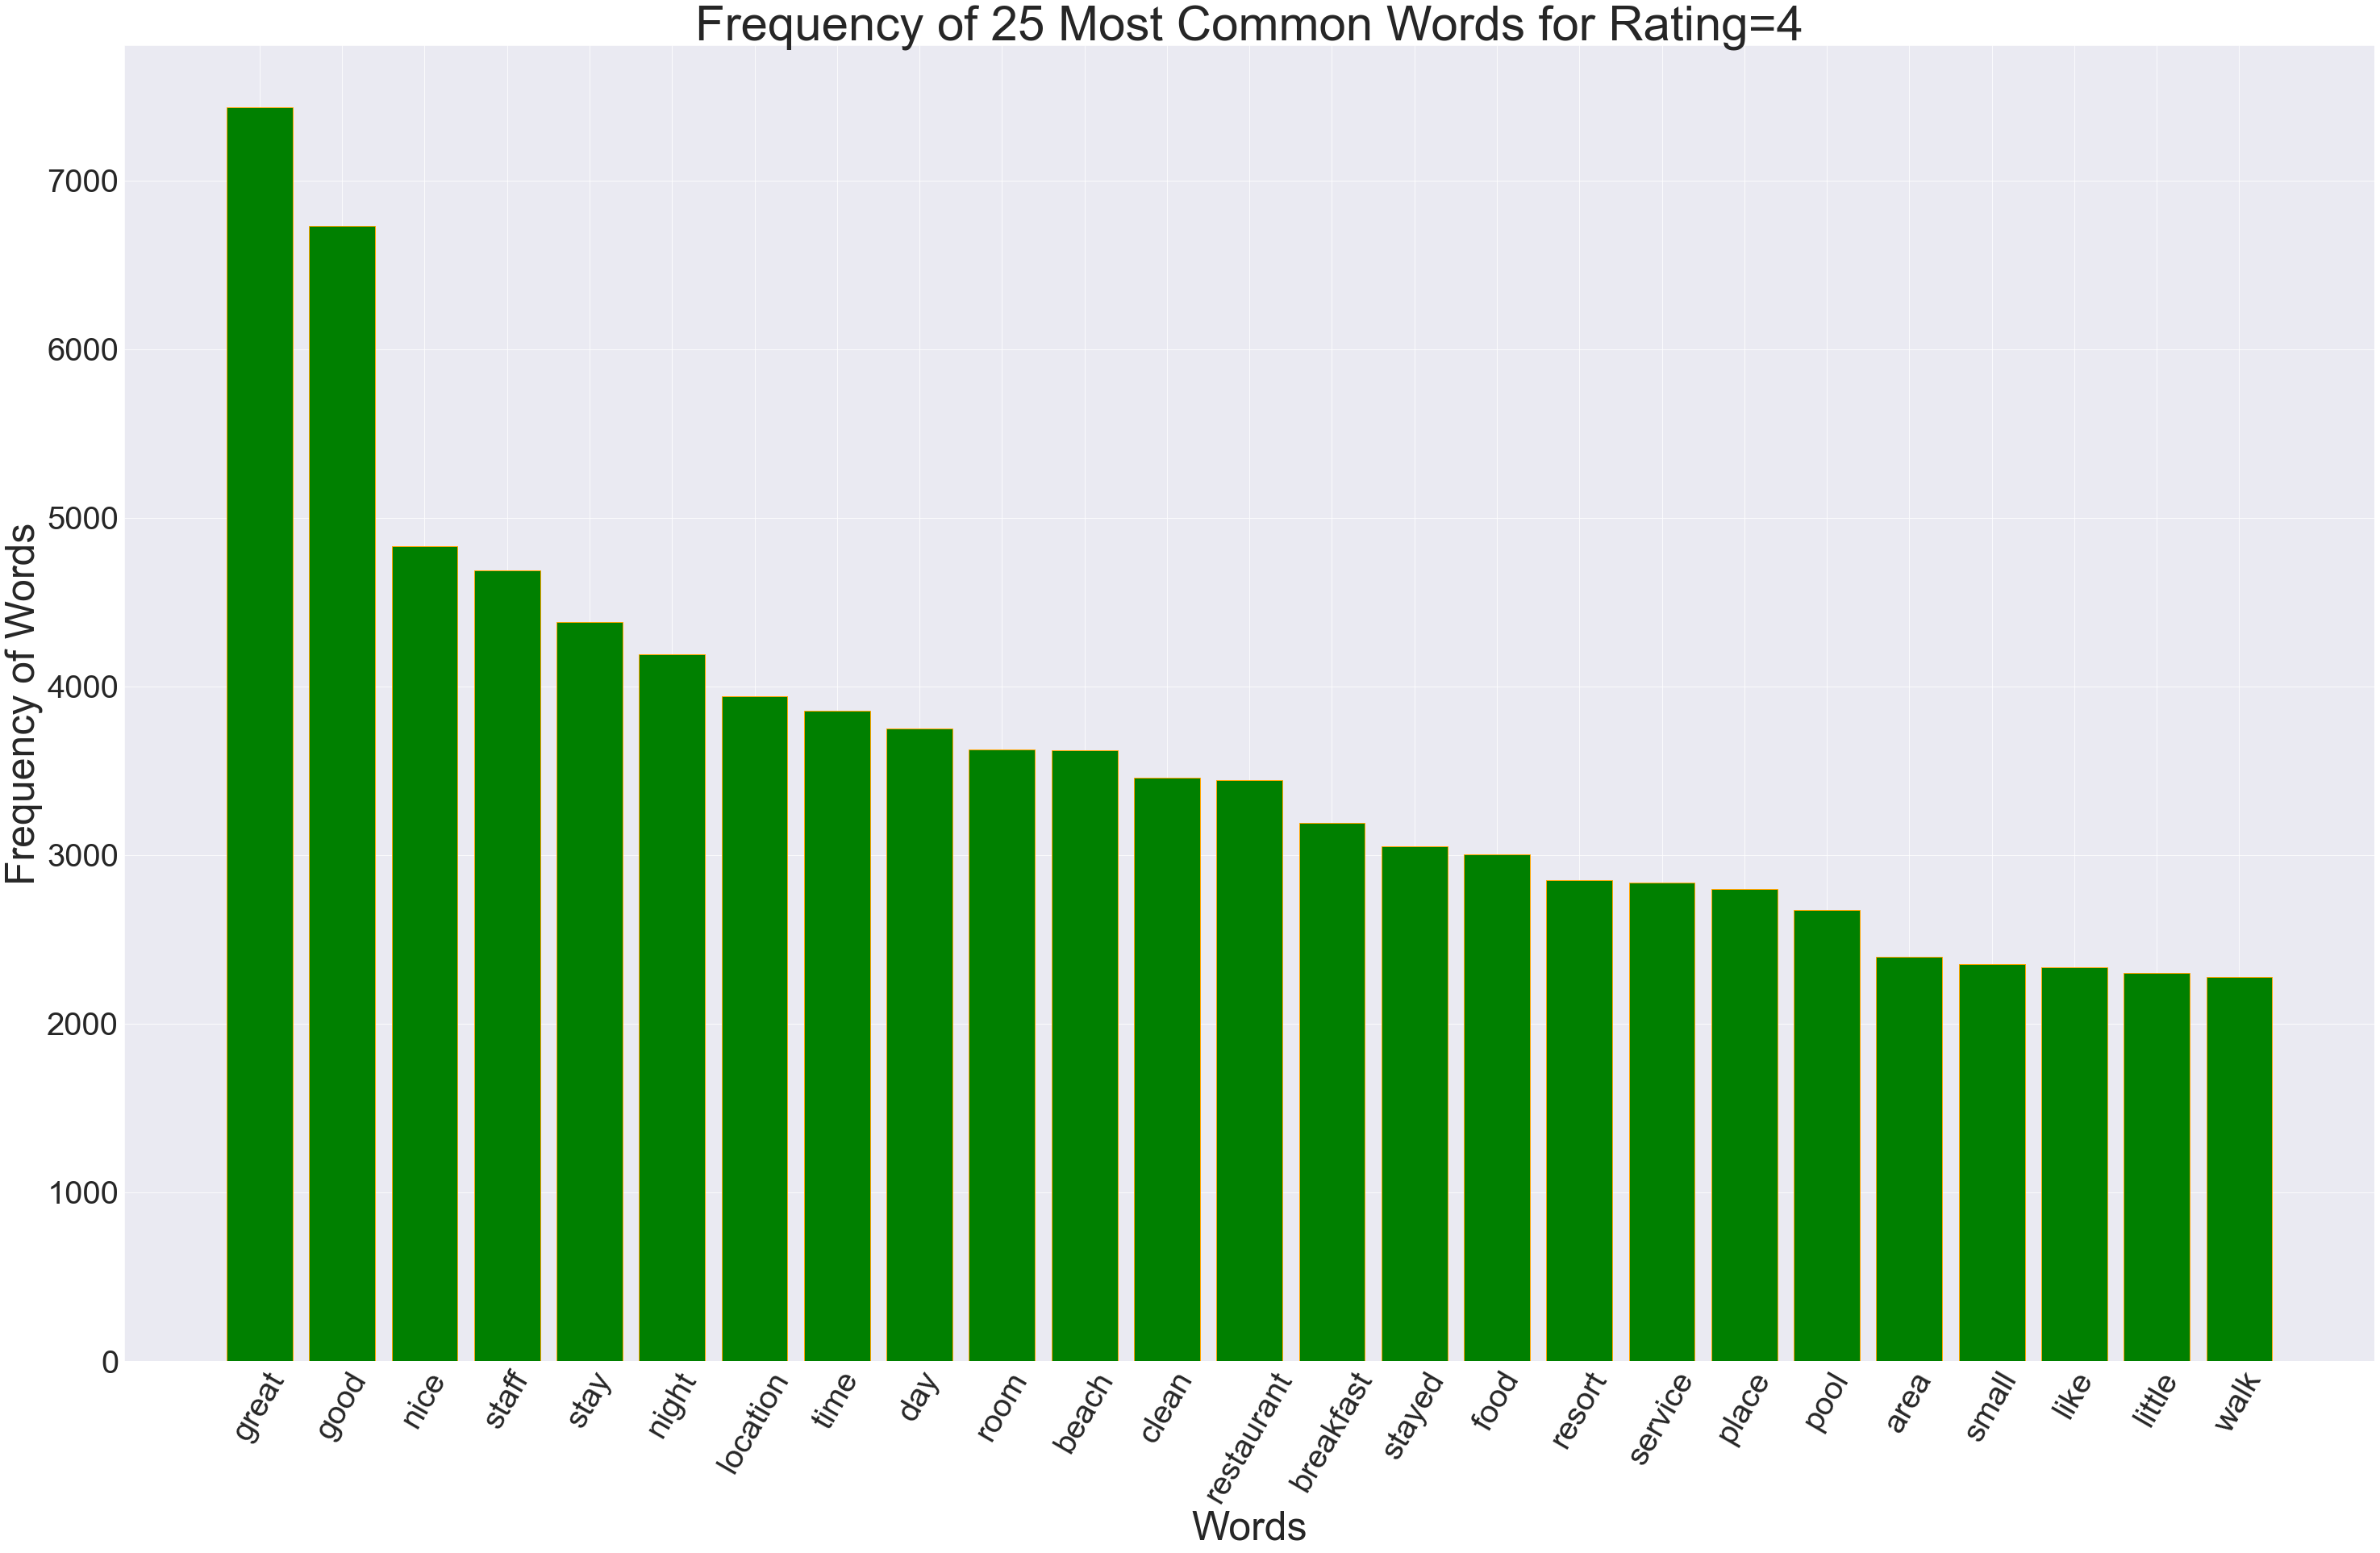

In [58]:
#Most frequent words for rating 4
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words3, freq3,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=4', fontsize=60)
plt.show()


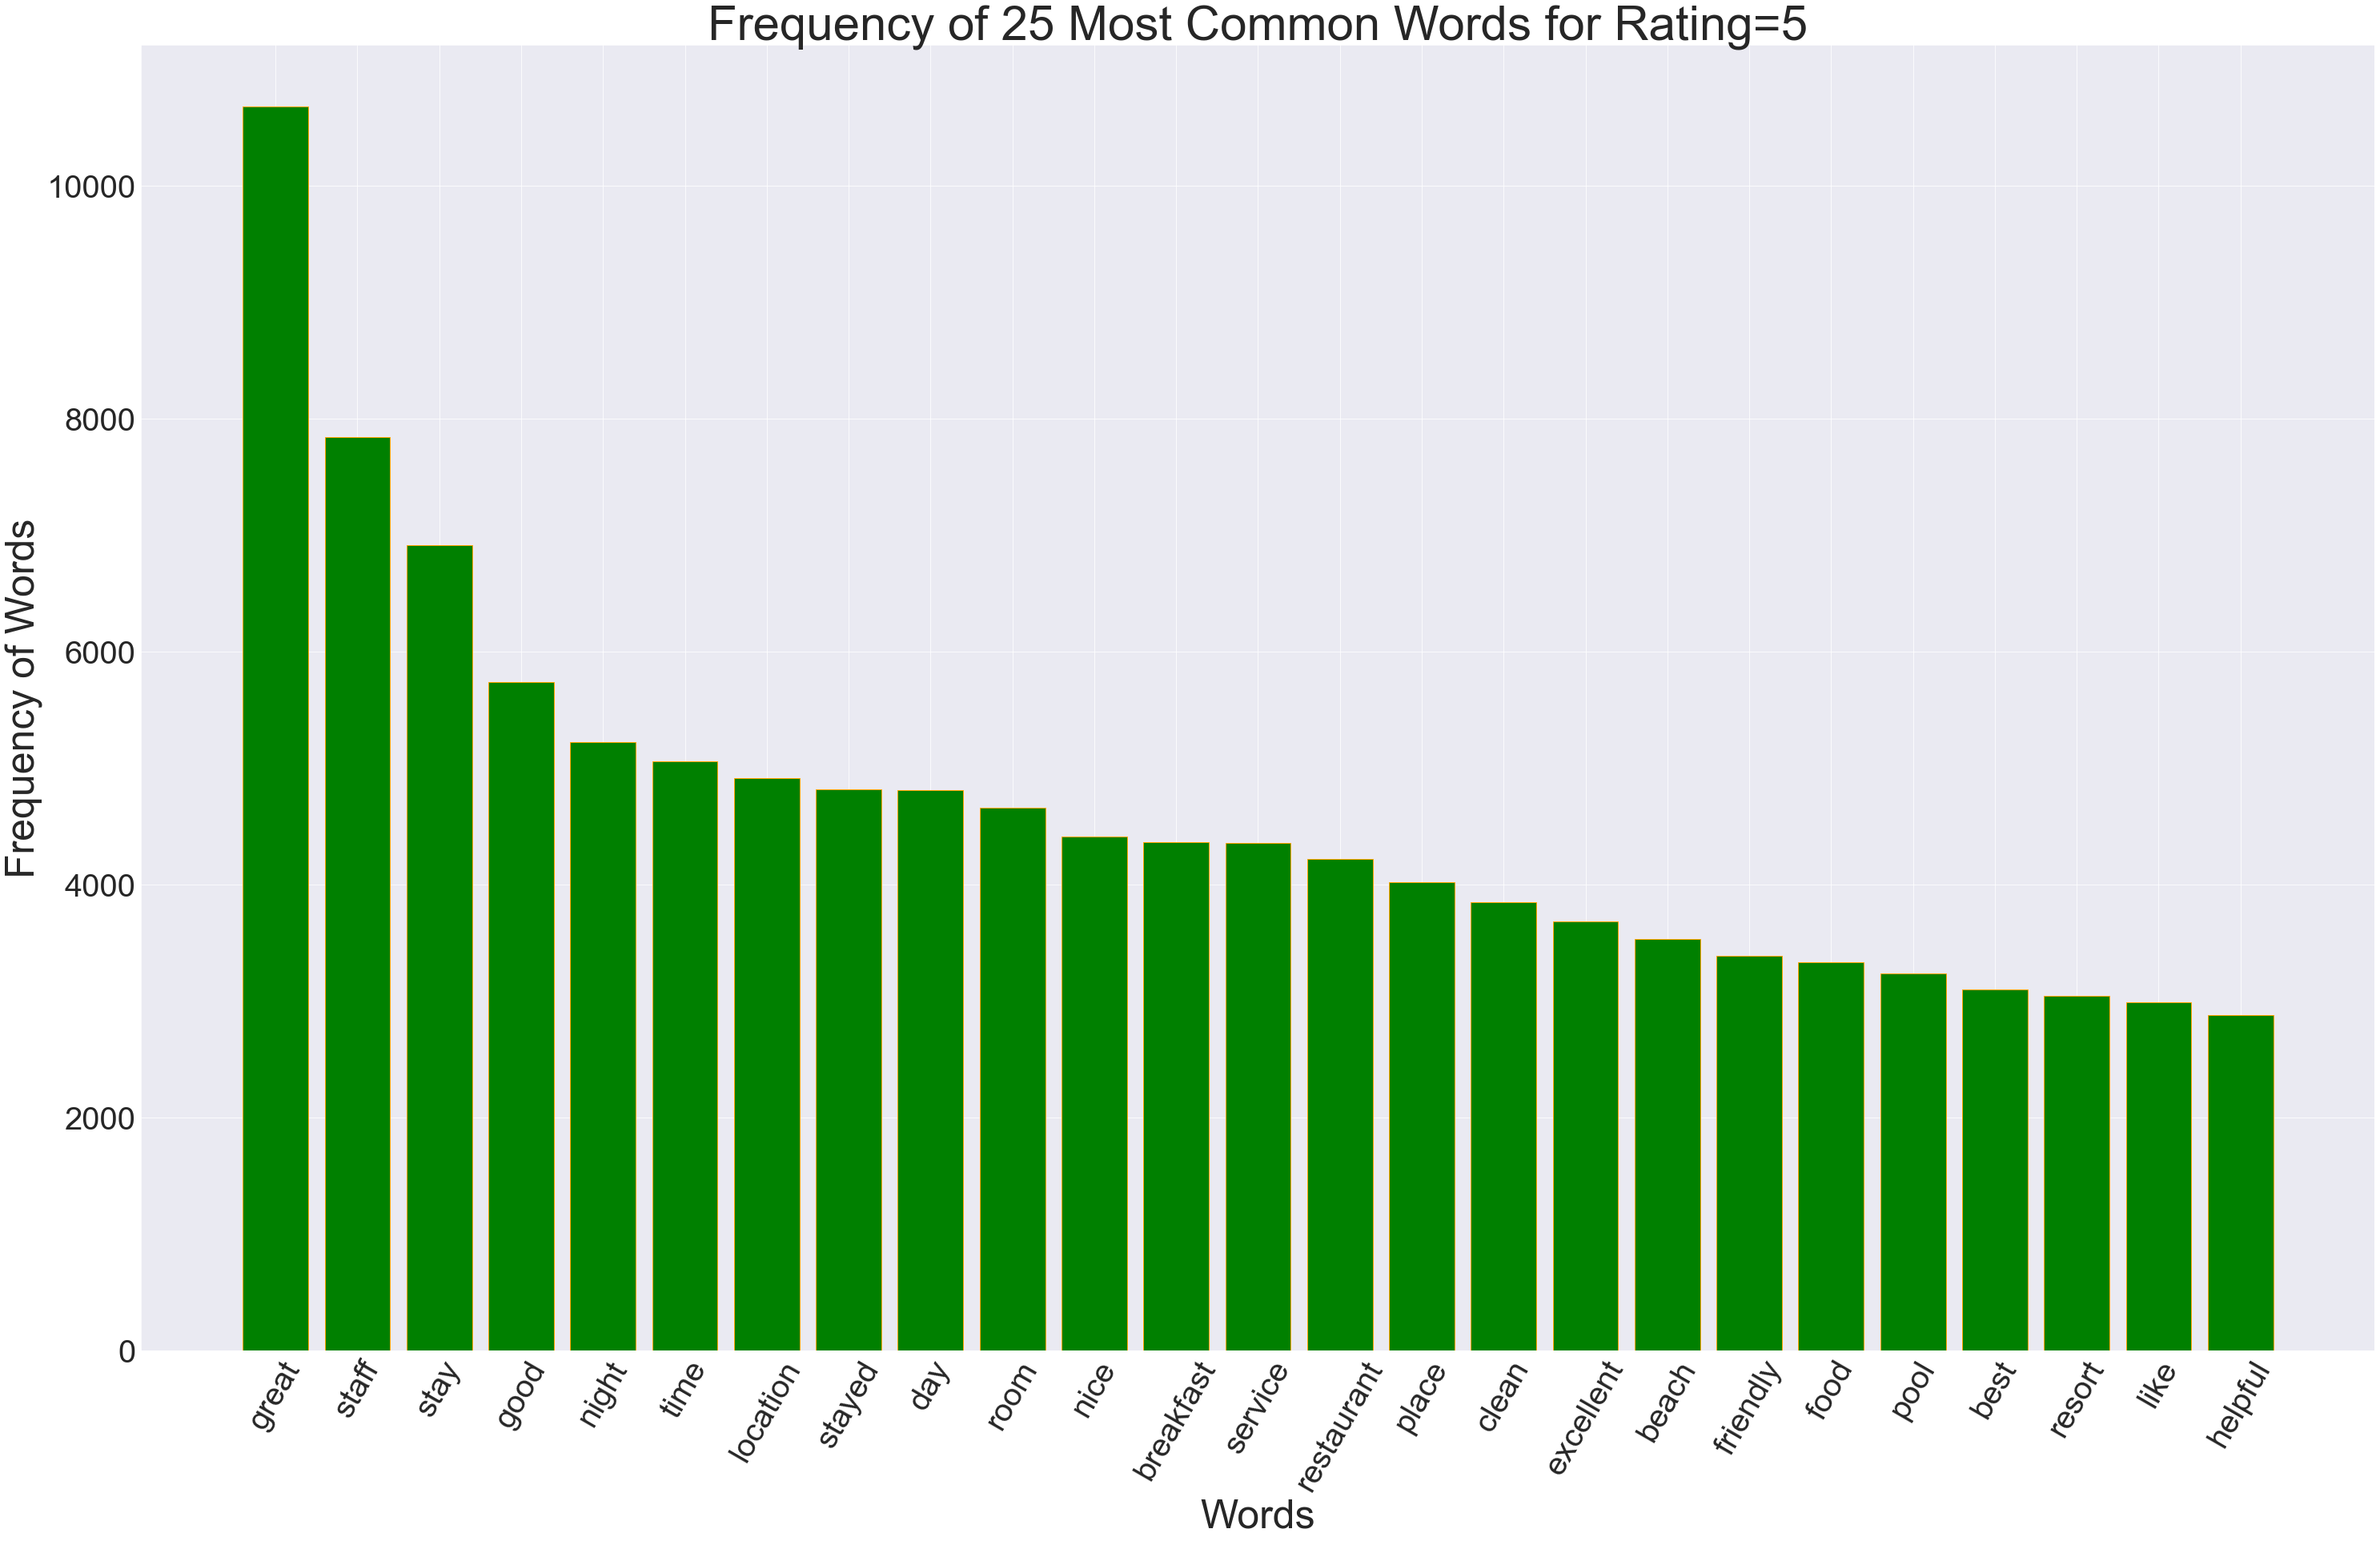

In [59]:
#Most frequent words for rating 5
group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words4, freq4,color="green",edgecolor="orange")
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=5', fontsize=60)
plt.show()



In [60]:
from pprint import pprint


In [62]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [63]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [64]:
# spacy for lemmatization
import spacy



In [65]:
pip install pyLDAvis

  Using cached pandas-2.1.1-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached numpy-1.26.0-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.0 which is incompatible.


In [66]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


In [67]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df["Cleaned_Review_Lemmatized"]))

print(data_words)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod)


FrozenPhrases<2299 phrases, min_count=5, threshold=100>


In [69]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data_words_nostops = remove_stopwords(data_words)


In [70]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


In [71]:
import spacy
spacy.cli.download("en_core_web_sm")




✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [72]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()



In [73]:
# Do lemmatization keeping only noun, adj, vb, adv
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out



In [74]:
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['nice', 'expensive', 'parking', 'get', 'good', 'deal', 'stay', 'anniversary', 'arrive', 'late', 'evening', 'take', 'advice', 'previous', 'review', 'valet_parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'nonexistent', 'view', 'clean', 'nice', 'size', 'bed', 'comfortable', 'wake', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'hear', 'music', 'night', 'morning', 'door', 'opening_close', 'hear', 'people', 'talk', 'hallway', 'maybe', 'noisy', 'product', 'nice', 'stay', 'nice', 'touch', 'take', 'advantage', 'stay', 'long', 'location', 'great', 'walking_distance', 'shop', 'overall', 'nice', 'experience', 'pay', 'parking', 'night']]


In [75]:
# View
print(corpus[:1])


['nice expensive parking got good deal stay anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed nonexistent view clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night']


In [76]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)



In [77]:
# Create Corpus
texts = data_lemmatized



In [78]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [79]:
# View
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 5), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 3), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)]]


In [80]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]





[(0,
  '0.025*"check" + 0.025*"ask" + 0.020*"tell" + 0.018*"say" + 0.018*"arrive" + '
  '0.017*"desk" + 0.015*"book" + 0.014*"give" + 0.013*"leave" + 0.012*"door"'),
 (1,
  '0.058*"block" + 0.047*"window" + 0.040*"entertainment" + 0.030*"parking" + '
  '0.019*"mini" + 0.018*"subway" + 0.017*"luxury" + 0.013*"royal" + '
  '0.013*"courtyard" + 0.013*"cafe"'),
 (2,
  '0.063*"stay" + 0.047*"great" + 0.033*"staff" + 0.027*"room" + '
  '0.023*"location" + 0.023*"good" + 0.023*"breakfast" + 0.022*"clean" + '
  '0.020*"night" + 0.018*"walk"'),
 (3,
  '0.047*"service" + 0.030*"restaurant" + 0.029*"beautiful" + 0.023*"love" + '
  '0.020*"enjoy" + 0.019*"wonderful" + 0.019*"return" + 0.015*"perfect" + '
  '0.014*"dinner" + 0.013*"amazing"'),
 (4,
  '0.023*"day" + 0.022*"time" + 0.021*"good" + 0.015*"go" + 0.012*"get" + '
  '0.012*"people" + 0.012*"want" + 0.011*"bar" + 0.011*"place" + '
  '0.010*"little"'),
 (5,
  '0.092*"pool" + 0.091*"resort" + 0.088*"beach" + 0.047*"food" + '
  '0.030*"water" 

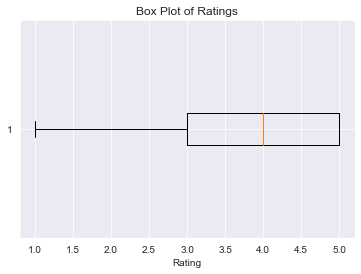

In [83]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.boxplot(df['Rating'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()